In this notebook we plot the following:
1. Barplot of the application over the static kernels
2. Barplot of the application over the instruction groups
3. Barplots for each instruction group over their corresponding instructions
4. Barplots for each static kernel over the instructions

note:
- static instruction/kernel = type of instruction/kernel
- dynamic instruction/kernel = an execution of a static instruction/kernel

In [1]:
import pandas as pd
import numpy as np

In [2]:
DATASET = 'salinas'#'indianPines''salinas''pavia_uni'
datasets_dict = {'salinas': 'Salinas', 'indianPines': 'Indian Pines', 'pavia_uni': 'Pavia University'}
MACHINE = 'workstation' # 'laptop'

In [3]:
#!cp ./drive/MyDrive/thesis/nvbitfi-igprofile.txt .
%cd profiles

/media/sergiu/D8989FA0989F7C26/Users/sergi/Documents/zenodo/profiles


# Load profile in a dataframe

Create list of dictionaries. Each dictionary corresponds to a line in the profile, i.e. each line corresponds to a dynamic kernel.

note: dynamic kernel = execution of a kernel

In [4]:
list_dynamic_kernels = []
#with open('nvbitfi-igprofile.txt', 'r') as f:
with open(f'nvbitfi-igprofile_{DATASET}_laptop.txt', 'r') as f:
  for line in f:
    dynamic_kern_exec = {}

    l = line.strip().split(';')

    dynamic_kern_exec['idx'] = int(l[1].strip().split(': ')[1])
    dynamic_kern_exec['kernel_name'] = l[2].strip().split(': ')[1]
    dynamic_kern_exec['ctas'] = int(l[3].strip().split(': ')[1])
    dynamic_kern_exec['tot_instr'] = int(l[4].strip().split(': ')[1])

    #idx = int(l[1].strip().split(': ')[1])
    #kernel_name = l[2].strip().split(': ')
    #ctas = int(l[3].strip().split(': ')[1])
    #tot_instr = int(l[4].strip().split(': ')[1])

    instrType_nr = l[5].strip().split(', ')
    instrType_nr[-1] = instrType_nr[-1][:-1] #last item in list ends with '805194,' and we need to get rid of ','
    instrType_nr_dict = {i.strip().split()[0][:-1]: int(i.strip().split()[1]) for i in instrType_nr}

    dynamic_kern_exec.update(instrType_nr_dict)

    list_dynamic_kernels.append(dynamic_kern_exec)



Create dataframe from list of dictionaries

In [5]:
profile_df = pd.DataFrame(list_dynamic_kernels)

In [6]:
profile_df

,idx,kernel_name,ctas,tot_instr,FADD,FADD32I,FCHK,FCMP,FFMA,FFMA32I,...,GETCRSPTR,SETCRSPTR,fp64,fp32,ld,pr,nodest,others,gppr,gp
0,0,voidcopy_kernel<float>(cublasCopyParams<float>),434,5555200,0,0,0,0,0,0,...,0,0,0,0,111104,555520,777728,4110848,4777472,4221952
1,1,"voidaxpy_kernel_val<float,float>(cublasAxpyPar...",434,6221824,0,0,0,0,111104,0,...,0,0,0,111104,222208,666624,1111040,4110848,5110784,4444160
2,2,"voidaxpy_kernel_val<float,float>(cublasAxpyPar...",434,6221824,0,0,0,0,111104,0,...,0,0,0,111104,222208,666624,1111040,4110848,5110784,4444160
3,3,"voidaxpy_kernel_val<float,float>(cublasAxpyPar...",434,6221824,0,0,0,0,111104,0,...,0,0,0,111104,222208,666624,1111040,4110848,5110784,4444160
4,4,"voidaxpy_kernel_val<float,float>(cublasAxpyPar...",434,6221824,0,0,0,0,111104,0,...,0,0,0,111104,222208,666624,1111040,4110848,5110784,4444160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17300,17300,cask_cudnn::computeBOffsetsKernel(cask_cudnn::...,2,58719,0,0,0,0,0,0,...,0,0,0,1024,0,5632,2573,49490,56146,50514
17301,17301,cudnn_maxwell_scudnn_128x32_3dconv_fprop_small...,3,3029278,0,0,0,0,1781760,0,...,0,0,0,1794048,362456,150656,168710,553408,2860568,2709912
17302,17302,"voidat::native::elementwise_kernel<128,2,at::n...",3,62592,0,0,0,0,768,0,...,0,0,0,768,1536,3840,2688,53760,59904,56064
17303,17303,voidat::native::vectorized_elementwise_kernel<...,2,12288,0,0,0,0,0,0,...,0,0,0,1280,384,1664,2560,6400,9728,8064


Define 'instruction_set' dictionary of lists, where each list corresponds to a type of instructions

In [7]:
instruction_set = {
    'Floating point 32': [
        'FADD',
        'FADD32I',
        'FCHK',
        'FCMP',
        'FFMA',
        'FFMA32I',
        'FMNMX',
        'FMUL',
        'FMUL32I',
        'FSEL',
        'FSET',
        'FSETP',
        'FSWZ',
        'FSWZADD'
    ],
    'Floating Point 16': [
        'HADD2',
        'HADD2_32I',
        'HFMA2',
        'HFMA2_32I',
        'HMNMX2',
        'HMUL2',
        'HMUL2_32I',
        'HSET2',
        'HSETP2'
    ],
    'SFU': [
        'MUFU',
        'RRO'
    ],
    'MMA': [
        'HMMA',
        'IMMA',
        'BMMA',
        'DMMA'
    ],
    'Double Point': [
        'DADD',
        'DFMA',
        'DMNMX',
        'DMUL',
        'DSET',
        'DSETP'
    ],
    'Integer': [
        'BFE',
        'BFI',
        'BMSK',
        'BREV',
        'FLO',
        'IABS',
        'IADD',
        'IADD3',
        'IADD32I',
        'ICMP',
        'IDP',
        'IDP4A',
        'IMAD',
        'IMAD32I',
        'IMADSP',
        'IMNMX',
        'IMUL',
        'IMUL32I',
        'IPA',
        'ISAD',
        'ISCADD',
        'ISCADD32I',
        'ISET',
        'ISETP',
        'LEA',
        'LOP',
        'LOP3',
        'LOP32I',
        'POPC',
        'SHF',
        'SHL',
        'SHR',
        'XMAD'
    ],
    'Video': [
        'VABSDIFF',
        'VABSDIFF4',
        'VADD',
        'VMAD',
        'VMNMX',
        'VSET',
        'VSETP',
        'VSHL',
        'VSHR'
    ],
    'Conversion': [
        'F2F',
        'F2I',
        'I2F',
        'I2I',
        'I2IP',
        'I2FP',
        'F2IP',
        'FRND'
    ],
    'Move': [
        'MOV',
        'MOV32I',
        'MOVM',
        'PRMT',
        'SEL',
        'SGXT',
        'SHFL'
    ],
    'Predicate/CC': [
        'PLOP3',
        'CSET',
        'CSETP',
        'PSET',
        'PSETP',
        'P2R',
        'R2P'
    ],
    'Load/Store': [
        'LD',
        'LDC',
        'LDG',
        'LDGDEPBAR',
        'LDGSTS',
        'LDL',
        'LDS',
        'LDSM',
        'LDSLK',
        'ST',
        'STG',
        'STL',
        'STS',
        'STSCUL',
        'MATCH',
        'QSPC',
        'ATOM',
        'ATOMS',
        'ATOMG',
        'RED',
        'CCTL',
        'CCTLL',
        'ERRBAR',
        'MEMBAR',
        'CCTLT'
    ],
    'Uniform Datapath': [
        'R2UR',
        'REDUX',
        'S2UR',
        'UBMSK',
        'UBREV',
        'UCLEA',
        'UF2FP',
        'UFLO',
        'UIADD3',
        'UIADD3_64',
        'UIMAD',
        'UISETP',
        'ULDC',
        'ULEA',
        'ULOP',
        'ULOP3',
        'ULOP32I',
        'UMOV',
        'UP2UR',
        'UPLOP3',
        'UPOPC',
        'UPRMT',
        'UPSETP',
        'UR2UP',
        'USEL',
        'USGXT',
        'USHF',
        'USHL',
        'USHR',
        'VOTEU'
    ],
    'Texture': [
        'TEX',
        'TLD',
        'TLD4',
        'TMML',
        'TXA',
        'TXD',
        'TXQ',
        'TEXS',
        'TLD4S',
        'TLDS',
        'STP'
    ],
    'Surface': [
        'SUATOM',
        'SUCLAMP',
        'SUBFM',
        'SUEAU',
        'SULD',
        'SULDGA',
        'SUQUERY',
        'SURED',
        'SUST',
        'SUSTGA'
    ],
    'Control': [
        'BMOV',
        'BPT',
        'BRA',
        'BREAK',
        'BRK',
        'BRX',
        'BRXU',
        'BSSY',
        'BSYNC',
        'CALL',
        'CAL',
        'CONT',
        'EXIT',
        'IDE',
        'JCAL',
        'JMP',
        'JMX',
        'JMXU',
        'KIL',
        'KILL',
        'LONGJMP',
        'NANOSLEEP',
        'PBK',
        'PCNT',
        'PEXIT',
        'PLONGJMP',
        'PRET',
        'RAM',
        'RET',
        'RPCMOV',
        'RTT',
        'SAM',
        'SSY',
        'SYNC',
        'WARPSYNC',
        'YIELD'
    ],
    'Miscellaneous': [
        'B2R',
        'BAR',
        'CS2R',
        'CSMTEST',
        'DEPBAR',
        'GETLMEMBASE',
        'LEPC',
        'NOP',
        'PMTRIG',
        'R2B',
        'S2R',
        'SETCTAID',
        'SETLMEMBASE',
        'VOTE',
        'VOTE_VTG',
        'GETCRSPTR',
        'SETCRSPTR',
        #'NUM_ISA_INSTRUCTIONS' #this one is not present in the profile. Consider deleting it later
    ]
}

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Barplot of the application over the static kernels

In [ ]:
dynamic_kernels_df = profile_df.iloc[:, 1:2].copy()
len(dynamic_kernels_df['kernel_name'].unique())

27

In [ ]:
#dynamic_kernels_df_copy = dynamic_kernels_df.copy()

# some of the (static) kernels share the same name but have different parameters. To avoid mapping two different kernels to the same name,
# we use this dict to map each kernel to a unique name
common_kern_names = {'voidgemv2T_kernel_val<int,int,float,float,float,float,128,16,4,4,false,false,cublasGemvParams<cublasGemvTensorStridedBatched<floatconst>,cublasGemvTensorStridedBatched<floatconst>,cublasGemvTensorStridedBatched<float>,float>>(cublasGemvParams<cublasGemvTensorStridedBatched<floatconst>,cublasGemvTensorStridedBatched<floatconst>,cublasGemvTensorStridedBatched<float>,float>,float,float)': 'voidgemv2T_kernel_val_VER1',
                     'voidgemv2T_kernel_val<int,int,float,float,float,float,128,16,2,2,false,false,cublasGemvParams<cublasGemvTensorStridedBatched<floatconst>,cublasGemvTensorStridedBatched<floatconst>,cublasGemvTensorStridedBatched<float>,float>>(cublasGemvParams<cublasGemvTensorStridedBatched<floatconst>,cublasGemvTensorStridedBatched<floatconst>,cublasGemvTensorStridedBatched<float>,float>,float,float)': 'voidgemv2T_kernel_val_VER2',
                     'voidsplitKreduce_kernel<32,16,int,float,float,float,float,true,false,false>(cublasSplitKParams<float>,floatconst*,floatconst*,float*,floatconst*,floatconst*,floatconst*,floatconst*,float*,void*,long,float*,int*)': 'voidsplitKreduce_kernel_VER1',
                     'voidsplitKreduce_kernel<32,16,int,float,float,float,float,true,true,false>(cublasSplitKParams<float>,floatconst*,floatconst*,float*,floatconst*,floatconst*,floatconst*,floatconst*,float*,void*,long,float*,int*)': 'voidsplitKreduce_kernel_VER2',
                     'voidgemv2N_kernel<int,int,float,float,float,float,128,4,4,4,1,false,cublasGemvParams<cublasGemvTensorStridedBatched<floatconst>,cublasGemvTensorStridedBatched<floatconst>,cublasGemvTensorStridedBatched<float>,float>>(cublasGemvParams<cublasGemvTensorStridedBatched<floatconst>,cublasGemvTensorStridedBatched<floatconst>,cublasGemvTensorStridedBatched<float>,float>)': 'voidgemv2N_kernel_VER1',
                     'voidgemv2N_kernel<int,int,float,float,float,float,128,1,4,4,1,false,cublasGemvParams<cublasGemvTensorStridedBatched<floatconst>,cublasGemvTensorStridedBatched<floatconst>,cublasGemvTensorStridedBatched<float>,float>>(cublasGemvParams<cublasGemvTensorStridedBatched<floatconst>,cublasGemvTensorStridedBatched<floatconst>,cublasGemvTensorStridedBatched<float>,float>)': 'voidgemv2N_kernel_VER2',
                     'voidgemv2N_kernel<int,int,float,float,float,float,128,2,4,4,1,false,cublasGemvParams<cublasGemvTensorStridedBatched<floatconst>,cublasGemvTensorStridedBatched<floatconst>,cublasGemvTensorStridedBatched<float>,float>>(cublasGemvParams<cublasGemvTensorStridedBatched<floatconst>,cublasGemvTensorStridedBatched<floatconst>,cublasGemvTensorStridedBatched<float>,float>)': 'voidgemv2N_kernel_VER3',
                     'voidat::native::elementwise_kernel<128,2,at::native::gpu_kernel_impl<at::native::direct_copy_kernel_cuda(at::TensorIteratorBase&)::{lambda()#2}::operator()()const::{lambda()#14}::operator()()const::{lambda(float)#1}>(at::TensorIteratorBase&,at::native::direct_copy_kernel_cuda(at::TensorIteratorBase&)::{lambda()#2}::operator()()const::{lambda()#14}::operator()()const::{lambda(float)#1}const&)::{lambda(int)#1}>(int,at::native::gpu_kernel_impl<at::native::direct_copy_kernel_cuda(at::TensorIteratorBase&)::{lambda()#2}::operator()()const::{lambda()#14}::operator()()const::{lambda(float)#1}>(at::TensorIteratorBase&,at::native::direct_copy_kernel_cuda(at::TensorIteratorBase&)::{lambda()#2}::operator()()const::{lambda()#14}::operator()()const::{lambda(float)#1}const&)::{lambda(int)#1})': 'elementwise_kernel_VER1',
                     'voidat::native::elementwise_kernel<128,2,at::native::gpu_kernel_impl<at::native::CUDAFunctor_add<float>>(at::TensorIteratorBase&,at::native::CUDAFunctor_add<float>const&)::{lambda(int)#1}>(int,at::native::gpu_kernel_impl<at::native::CUDAFunctor_add<float>>(at::TensorIteratorBase&,at::native::CUDAFunctor_add<float>const&)::{lambda(int)#1})': 'elementwise_kernel_VER2'}

for i in range(dynamic_kernels_df.shape[0]):#['kernel_name'].unique():
  if dynamic_kernels_df.iloc[i,0] in common_kern_names.keys():
    dynamic_kernels_df.iloc[i,0] = common_kern_names[dynamic_kernels_df.iloc[i,0]]

  if 'computeBOffsetsKernel' in dynamic_kernels_df.iloc[i,0]:
    dynamic_kernels_df.iloc[i,0] = 'computeBOffsetsKernel'

  if '<' in dynamic_kernels_df.iloc[i,0]:
    dynamic_kernels_df.iloc[i,0] = dynamic_kernels_df.iloc[i,0].strip().split('<')[0]
    #print(kern_name)

  if '::' in dynamic_kernels_df.iloc[i,0]:
    dynamic_kernels_df.iloc[i,0] = dynamic_kernels_df.iloc[i,0].strip().split("::")[-1]

  #print(kern_name)
len(dynamic_kernels_df['kernel_name'].unique())

27

In [ ]:
ds = dynamic_kernels_df.groupby('kernel_name').value_counts()
ds2 = pd.Series()

ds2['computeBOffsetsKernel'] = ds['computeBOffsetsKernel']
ds2['computeOffsetsKernel3D'] = ds['computeOffsetsKernel3D']
ds2['scudnn_3dconv_medium'] = ds['cudnn_maxwell_scudnn_128x32_3dconv_fprop_medium_nn_v0']
ds2['scudnn_3dconv_small'] = ds['cudnn_maxwell_scudnn_128x32_3dconv_fprop_small_nn_v0']
ds2['cupy_concatenate'] = ds['cupy_concatenate']
ds2['cupy_float32'] = ds['cupy_copy__float32_float32']
ds2['elementwise_VER1'] = ds['elementwise_kernel']
ds2['elementwise_VER2'] = ds['elementwise_kernel_VER2']
ds2['sgemm'] = ds['maxwell_sgemm_128x32_tn']
ds2['vectorized_elementwise'] = ds['vectorized_elementwise_kernel']
ds2['voidaxpy'] = ds['voidaxpy_kernel_val']
ds2['voidcopy'] = ds['voidcopy_kernel']
ds2['voiddot'] = ds['voiddot_kernel']
ds2['gemmSN_TN'] = ds['voidgemmSN_TN_kernel']
ds2['gemmk1'] = ds['voidgemmk1_kernel']
ds2['gemv2N_VER1'] = ds['voidgemv2N_kernel_VER1']
ds2['gemv2N_VER2'] = ds['voidgemv2N_kernel_VER2']
ds2['gemv2N_VER3'] = ds['voidgemv2N_kernel_VER3']
ds2['gemv2T_VER1'] = ds['voidgemv2T_kernel_val_VER1']
ds2['gemv2T_VER2'] = ds['voidgemv2T_kernel_val_VER2']#cudnn_maxwell_scudnn_128x32_3dconv_fprop_medium_nn_v0
ds2['voidger'] = ds['voidger_kernel']
ds2['convolveNd_sgemm'] = ds['voidimplicit_convolveNd_sgemm']
ds2['nrm2'] = ds['voidnrm2_kernel']
ds2['reduce_1Block'] = ds['voidreduce_1Block_kernel']
ds2['scal_val'] = ds['voidscal_kernel_val']
ds2['splitKreduce_VER1'] = ds['voidsplitKreduce_kernel_VER1']
ds2['splitKreduce_VER2'] = ds['voidsplitKreduce_kernel_VER2']

In [ ]:
#dynamic_kernels_df[dynamic_kernels_df['kernel_name'] == 'voidcopy_kernel']
dynamic_kernels_df.groupby('kernel_name').value_counts()

,count
kernel_name,
computeBOffsetsKernel,2165
computeOffsetsKernel3D,2165
cudnn_maxwell_scudnn_128x32_3dconv_fprop_medium_nn_v0,1082
cudnn_maxwell_scudnn_128x32_3dconv_fprop_small_nn_v0,1083
cupy_concatenate,1082
cupy_copy__float32_float32,5
elementwise_kernel,1083
elementwise_kernel_VER2,2166
maxwell_sgemm_128x32_tn,1082


In [ ]:
!mkdir plots
!mkdir plots/{DATASET}_distribution_over_instructions_per_instructiongrp
!mkdir plots/{DATASET}_instruction_distributions_per_kernel

<ipython-input-13-2f5c4748fd2d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=kernels_counts, palette='Blues')#.set_yscale('log')#.set(xlabel='instructions', ylabel='log(#executions)')


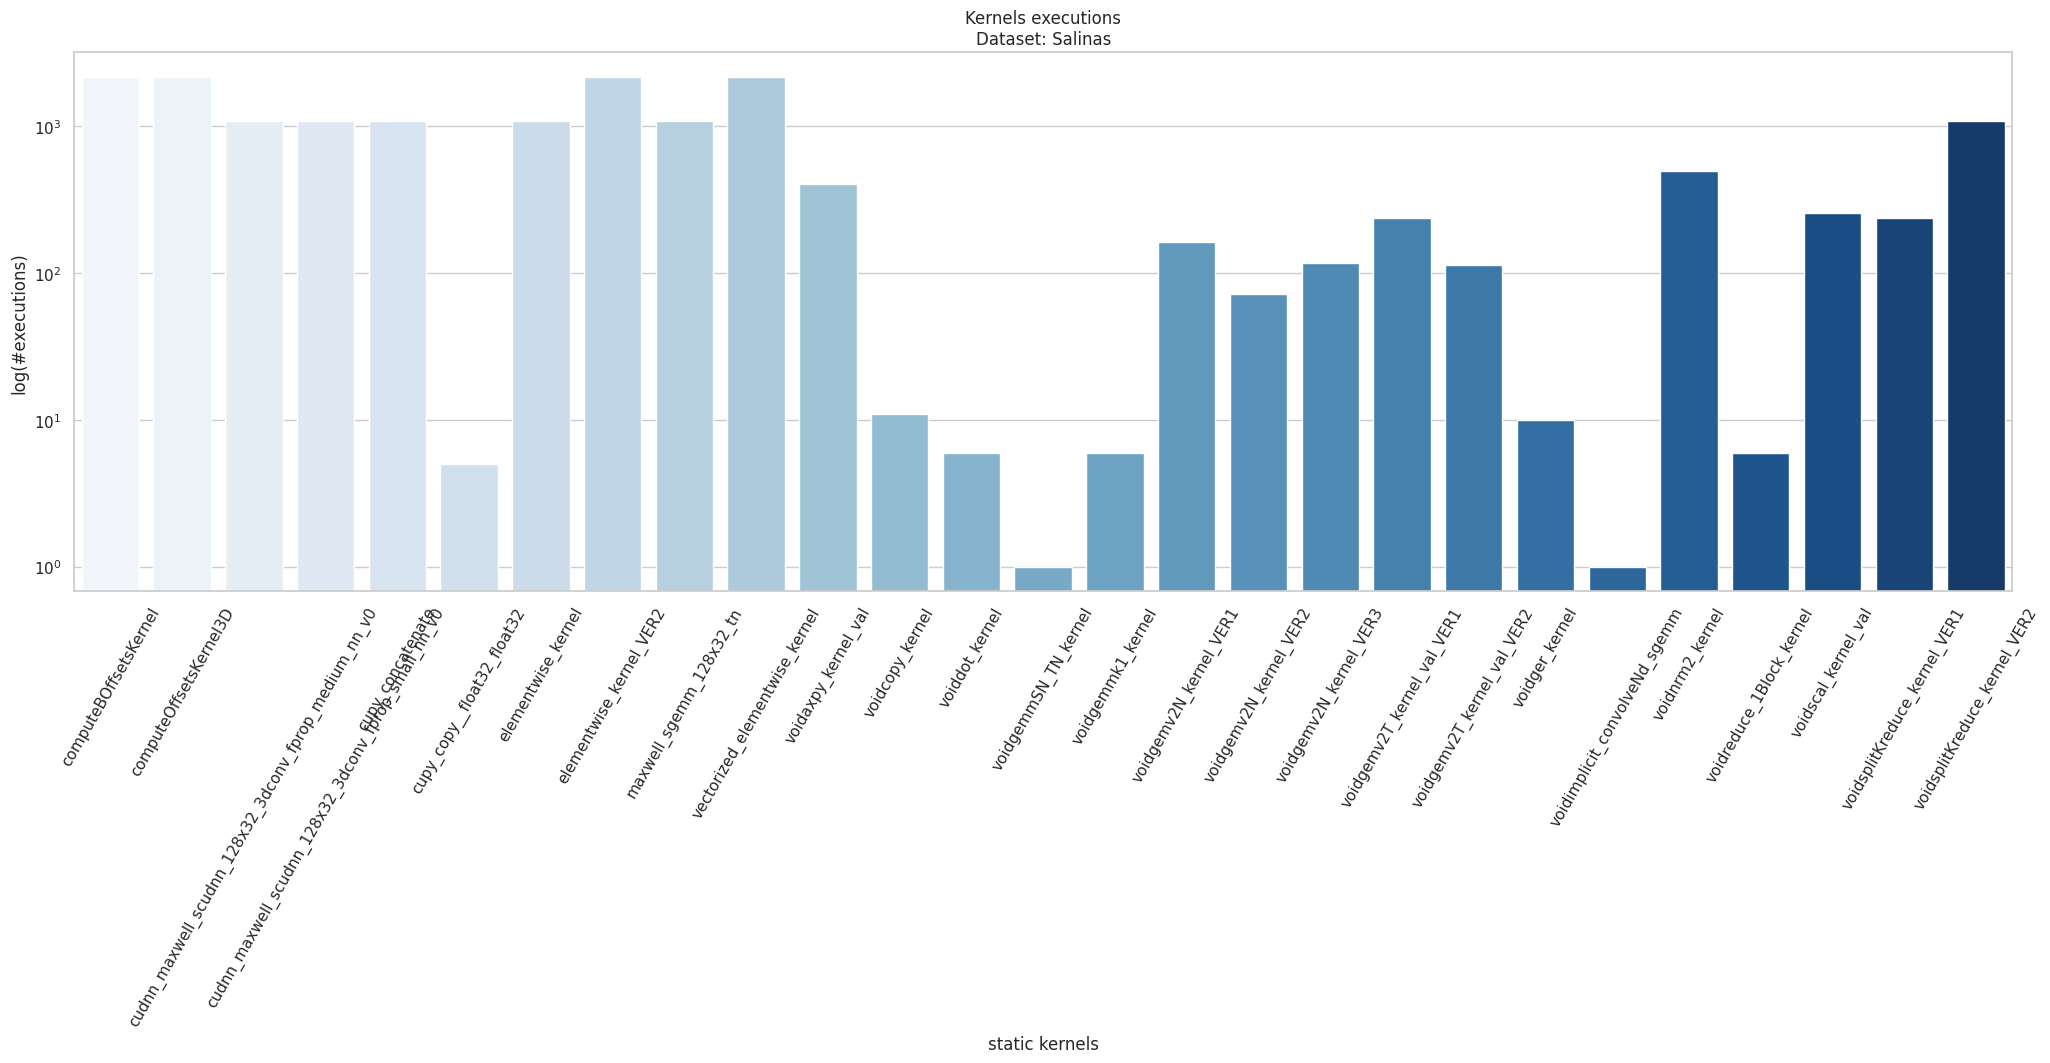

In [ ]:
def barplot_kernels(kernels_df):
  #NUM_PLOTS = (2,1)

  kernels_counts = dynamic_kernels_df.groupby('kernel_name').value_counts()

  sns.set_theme(style="whitegrid", rc={'figure.figsize':(25,7)}) #(25,25)

  barplot = sns.barplot(data=kernels_counts, palette='Blues')#.set_yscale('log')#.set(xlabel='instructions', ylabel='log(#executions)')
  barplot.set(xlabel='static kernels', ylabel='log(#executions)')
  barplot.set_yscale('log')
  #barplot.set_title('Floating Point 32 Instruction Group')
  barplot.tick_params(axis='x', rotation=60)
  #barplot.set_title('Kernels execution distribution')
  barplot.set_title(f'Kernels executions\nDataset: {datasets_dict[DATASET]}')

  fig = barplot.get_figure()
  fig.savefig(f'plots/{DATASET}_application_over_the_static_kernels', bbox_inches="tight")

barplot_kernels(dynamic_kernels_df)

<ipython-input-36-d7a1f3cef01a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=kernels_counts, palette='Blues')#.set_yscale('log')#.set(xlabel='instructions', ylabel='log(#executions)')


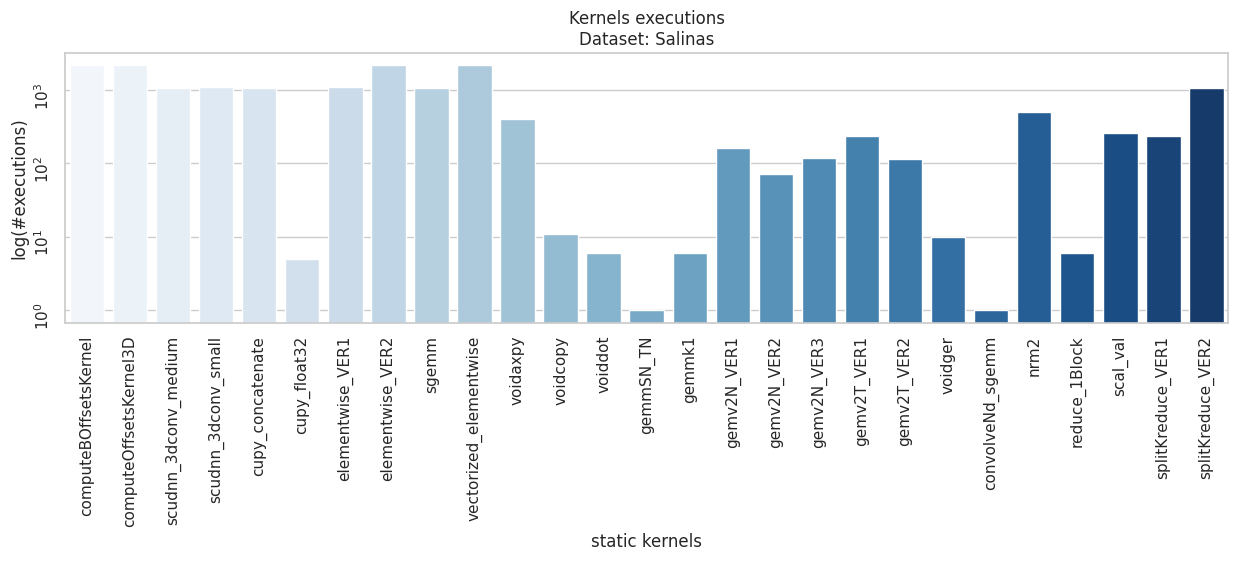

In [ ]:
def barplot_kernels(kernels_ds):
  #NUM_PLOTS = (2,1)

  kernels_counts = kernels_ds#dynamic_kernels_df.groupby('kernel_name').value_counts()

  sns.set_theme(style="whitegrid", rc={'figure.figsize':(15, 3.5)}) #(25,7)(25,25)

  barplot = sns.barplot(data=kernels_counts, palette='Blues')#.set_yscale('log')#.set(xlabel='instructions', ylabel='log(#executions)')
  barplot.set(xlabel='static kernels', ylabel='log(#executions)')
  barplot.set_yscale('log')
  #barplot.set_title('Floating Point 32 Instruction Group')
  barplot.tick_params(axis='x', rotation=90)#60
  barplot.tick_params(axis='y', rotation=90)
  #barplot.set_title('Kernels execution distribution')
  barplot.set_title(f'Kernels executions\nDataset: {datasets_dict[DATASET]}')

  fig = barplot.get_figure()
  fig.savefig(f'plots/{DATASET}_application_over_the_static_kernels', bbox_inches="tight")

barplot_kernels(ds2)

# 2. Barplot of the application over the instruction groups

In [ ]:
# select columns corresponding to the instructions
instr_count_df = profile_df.iloc[:, 4:-8]

# count for each (static) instruction how many times it has been executed
instr_series = instr_count_df.sum(axis=0)

# create pandas series to store the total nr of dynamic instructions within each instruction group
instruction_groups_dict = {i: 0 for i in instruction_set.keys()}
instruction_groups_df = pd.Series(instruction_groups_dict)

for ig in instruction_set.keys():
  mask = [_ in instruction_set[ig] for _ in instr_series.keys()]
  instruction_groups_df[ig] = instr_series[mask].sum()

instruction_groups_df[instruction_groups_df != 0]

,0
Floating point 32,10517811366
SFU,28628132
Integer,32279151170
Video,133550553
Conversion,25262652
Move,2943487330
Predicate/CC,309684795
Load/Store,10138850261
Control,2761611661
Miscellaneous,4047141278


<ipython-input-16-ac8e6ebed7ac>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=ig_ds, palette='Blues')#.set_yscale('log')#.set(xlabel='instructions', ylabel='log(#executions)')


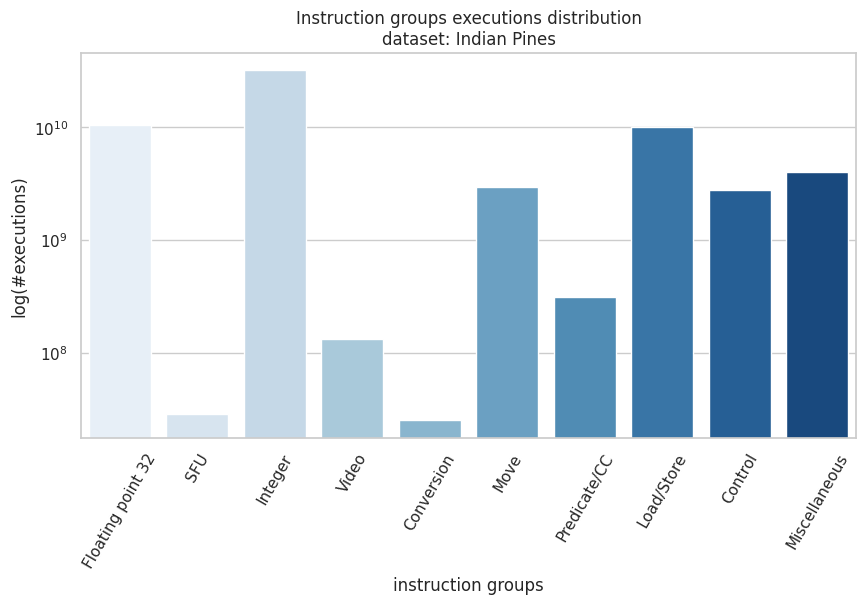

In [ ]:
def barplot_instrgroups(ig_ds):
  #NUM_PLOTS = (2,1)

  #sns.set_theme(style="whitegrid", rc={'figure.figsize':(15,7)}) #(15,15)

  sns.set_theme(style="whitegrid", rc={'figure.figsize':(10,5)})

  barplot = sns.barplot(data=ig_ds, palette='Blues')#.set_yscale('log')#.set(xlabel='instructions', ylabel='log(#executions)')
  barplot.set(xlabel='instruction groups', ylabel='log(#executions)')
  barplot.set_yscale('log')
  #barplot.set_title('Floating Point 32 Instruction Group')
  barplot.tick_params(axis='x', rotation=60)
  barplot.set_title(f'Instruction groups executions distribution\ndataset: {datasets_dict[DATASET]}')

  fig = barplot.get_figure()
  fig.savefig(f'plots/{DATASET}_instruction_groups_executions_distribution', bbox_inches="tight")

barplot_instrgroups(instruction_groups_df[instruction_groups_df != 0])

# 3. Barplots of the entire application over instruction groups

select just the columns corresponding to the Instruction Set

In [ ]:
# select just the columns corresponding to the Instruction Set
instr_count_df = profile_df.iloc[:, 4:-8]

# get execution count over the entire application for each instruction
instr_series = instr_count_df.sum(axis=0)#.keys()

instrType_dict = {}

for _type in instruction_set.keys():
  chosen_instr_series = instr_series[instruction_set[_type]]
  chosen_instr_series = chosen_instr_series[chosen_instr_series>0] # remove instructions with counts=0

  if len(chosen_instr_series) == 0:
    print(f"No {_type} instructions")
  else:
    instrType_dict[_type] = chosen_instr_series

print(chosen_instr_series)

#fp_instr_series = instr_series[instruction_set['Floating point 32']]
#fp_instr_series[fp_instr_series > 0]

No Floating Point 16 instructions
No MMA instructions
No Double Point instructions
No Uniform Datapath instructions
No Texture instructions
No Surface instructions
BAR        562894976
DEPBAR    1944144029
NOP        989388966
S2R        550713307
dtype: int64


In [ ]:
len(instruction_set.keys())

16

In [ ]:
sns.set_theme(style="whitegrid", rc={'figure.figsize':(15,7)})

<ipython-input-22-6d67a09cbb62>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=chosen_instr_series, palette='Blues')#.set_yscale('log')#.set(xlabel='instructions', ylabel='log(#executions)')
<ipython-input-22-6d67a09cbb62>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=chosen_instr_series, palette='Blues')#.set_yscale('log')#.set(xlabel='instructions', ylabel='log(#executions)')
<ipython-input-22-6d67a09cbb62>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=chosen_instr_series, palette='Bl

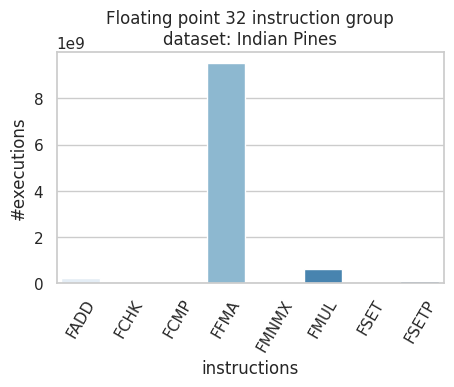

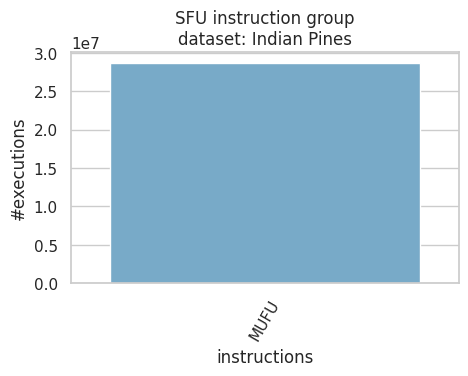

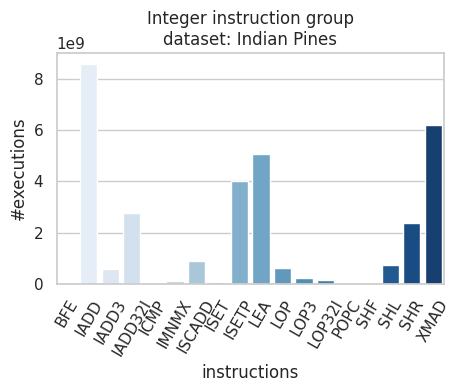

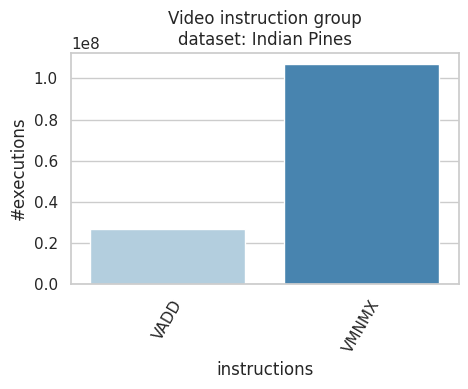

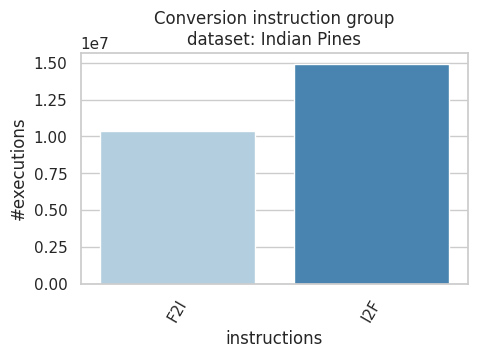

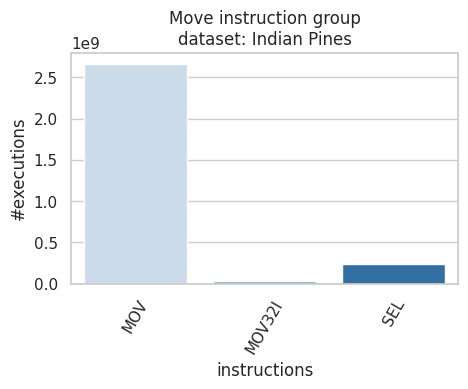

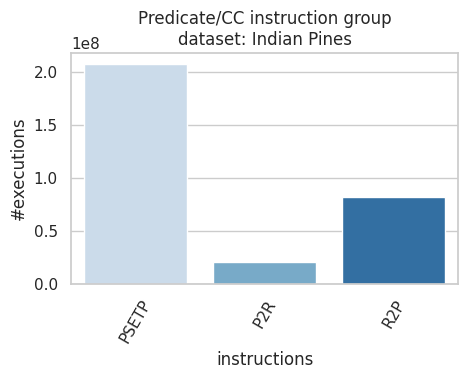

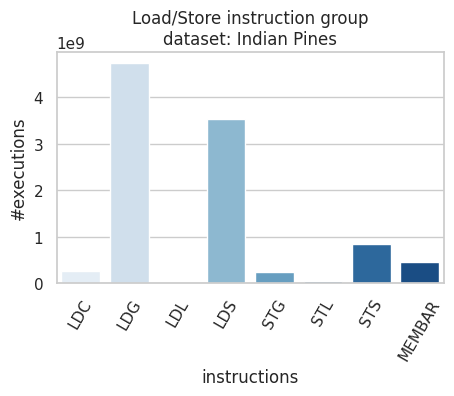

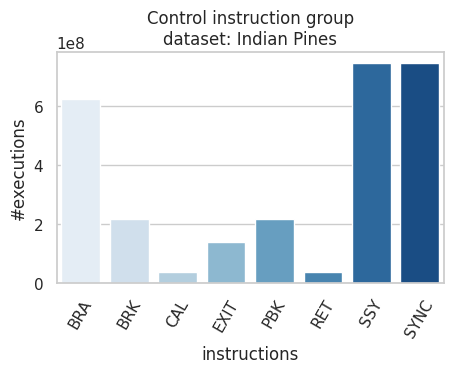

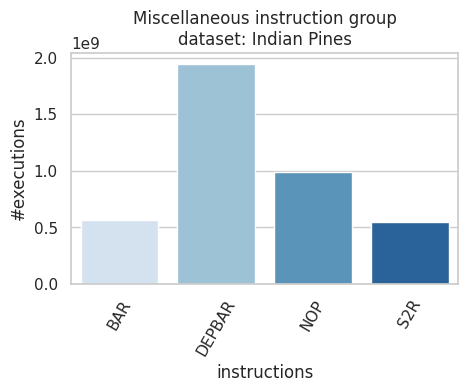

In [ ]:
def barplots(instrType_dict):

  i = 0
  for _type in list(instrType_dict.keys()):
    plt.figure(i)
    i+=1

    chosen_instr_series = instrType_dict[_type]

    sns.set_theme(style="whitegrid", rc={'figure.figsize':(5,3)}) #(15,9)

    barplot = sns.barplot(data=chosen_instr_series, palette='Blues')#.set_yscale('log')#.set(xlabel='instructions', ylabel='log(#executions)')

    #barplot.set(xlabel='instructions', ylabel='log(#executions)')
    barplot.set(xlabel='instructions', ylabel='#executions')
    #barplot.set_yscale('log')

    #barplot.set_title('Floating Point 32 Instruction Group')
    barplot.tick_params(axis='x', rotation=60)
    barplot.set_title(f"{_type} instruction group\ndataset: {datasets_dict[DATASET]}")

    fig = barplot.get_figure()

    if '/' in _type:
      splits = _type.split('/')
      fig.savefig(f"plots/{DATASET}_distribution_over_instructions_per_instructiongrp/{splits[0]+'_'+splits[1]}", bbox_inches="tight")
    else:
      fig.savefig(f'plots/{DATASET}_distribution_over_instructions_per_instructiongrp/{_type}', bbox_inches="tight")

barplots(instrType_dict)

# 4. Barplots for each static kernel over the instructions

In [ ]:
df1 = profile_df.iloc[:, 1:2]
df2 = profile_df.iloc[:, 4:-8]

dynamic_kernels_df = pd.concat([df1, df2], axis=1)

In [ ]:
len(dynamic_kernels_df['kernel_name'].unique())

25

In [ ]:
#dynamic_kernels_df_copy = dynamic_kernels_df.copy()

# some of the (static) kernels share the same name but have different parameters. To avoid mapping two different kernels to the same name,
# we use this dict to map each kernel to a unique name
common_kern_names = {'voidgemv2T_kernel_val<int,int,float,float,float,float,128,16,4,4,false,false,cublasGemvParams<cublasGemvTensorStridedBatched<floatconst>,cublasGemvTensorStridedBatched<floatconst>,cublasGemvTensorStridedBatched<float>,float>>(cublasGemvParams<cublasGemvTensorStridedBatched<floatconst>,cublasGemvTensorStridedBatched<floatconst>,cublasGemvTensorStridedBatched<float>,float>,float,float)': 'voidgemv2T_kernel_val_VER1',
                     'voidgemv2T_kernel_val<int,int,float,float,float,float,128,16,2,2,false,false,cublasGemvParams<cublasGemvTensorStridedBatched<floatconst>,cublasGemvTensorStridedBatched<floatconst>,cublasGemvTensorStridedBatched<float>,float>>(cublasGemvParams<cublasGemvTensorStridedBatched<floatconst>,cublasGemvTensorStridedBatched<floatconst>,cublasGemvTensorStridedBatched<float>,float>,float,float)': 'voidgemv2T_kernel_val_VER2',
                     'voidsplitKreduce_kernel<32,16,int,float,float,float,float,true,false,false>(cublasSplitKParams<float>,floatconst*,floatconst*,float*,floatconst*,floatconst*,floatconst*,floatconst*,float*,void*,long,float*,int*)': 'voidsplitKreduce_kernel_VER1',
                     'voidsplitKreduce_kernel<32,16,int,float,float,float,float,true,true,false>(cublasSplitKParams<float>,floatconst*,floatconst*,float*,floatconst*,floatconst*,floatconst*,floatconst*,float*,void*,long,float*,int*)': 'voidsplitKreduce_kernel_VER2',
                     'voidgemv2N_kernel<int,int,float,float,float,float,128,4,4,4,1,false,cublasGemvParams<cublasGemvTensorStridedBatched<floatconst>,cublasGemvTensorStridedBatched<floatconst>,cublasGemvTensorStridedBatched<float>,float>>(cublasGemvParams<cublasGemvTensorStridedBatched<floatconst>,cublasGemvTensorStridedBatched<floatconst>,cublasGemvTensorStridedBatched<float>,float>)': 'voidgemv2N_kernel_VER1',
                     'voidgemv2N_kernel<int,int,float,float,float,float,128,1,4,4,1,false,cublasGemvParams<cublasGemvTensorStridedBatched<floatconst>,cublasGemvTensorStridedBatched<floatconst>,cublasGemvTensorStridedBatched<float>,float>>(cublasGemvParams<cublasGemvTensorStridedBatched<floatconst>,cublasGemvTensorStridedBatched<floatconst>,cublasGemvTensorStridedBatched<float>,float>)': 'voidgemv2N_kernel_VER2',
                     'voidgemv2N_kernel<int,int,float,float,float,float,128,2,4,4,1,false,cublasGemvParams<cublasGemvTensorStridedBatched<floatconst>,cublasGemvTensorStridedBatched<floatconst>,cublasGemvTensorStridedBatched<float>,float>>(cublasGemvParams<cublasGemvTensorStridedBatched<floatconst>,cublasGemvTensorStridedBatched<floatconst>,cublasGemvTensorStridedBatched<float>,float>)': 'voidgemv2N_kernel_VER3',
                     'voidat::native::elementwise_kernel<128,2,at::native::gpu_kernel_impl<at::native::direct_copy_kernel_cuda(at::TensorIteratorBase&)::{lambda()#2}::operator()()const::{lambda()#14}::operator()()const::{lambda(float)#1}>(at::TensorIteratorBase&,at::native::direct_copy_kernel_cuda(at::TensorIteratorBase&)::{lambda()#2}::operator()()const::{lambda()#14}::operator()()const::{lambda(float)#1}const&)::{lambda(int)#1}>(int,at::native::gpu_kernel_impl<at::native::direct_copy_kernel_cuda(at::TensorIteratorBase&)::{lambda()#2}::operator()()const::{lambda()#14}::operator()()const::{lambda(float)#1}>(at::TensorIteratorBase&,at::native::direct_copy_kernel_cuda(at::TensorIteratorBase&)::{lambda()#2}::operator()()const::{lambda()#14}::operator()()const::{lambda(float)#1}const&)::{lambda(int)#1})': 'elementwise_kernel_VER1',
                     'voidat::native::elementwise_kernel<128,2,at::native::gpu_kernel_impl<at::native::CUDAFunctor_add<float>>(at::TensorIteratorBase&,at::native::CUDAFunctor_add<float>const&)::{lambda(int)#1}>(int,at::native::gpu_kernel_impl<at::native::CUDAFunctor_add<float>>(at::TensorIteratorBase&,at::native::CUDAFunctor_add<float>const&)::{lambda(int)#1})': 'elementwise_kernel_VER2'}

for i in range(dynamic_kernels_df.shape[0]):#['kernel_name'].unique():
  if dynamic_kernels_df.iloc[i,0] in common_kern_names.keys():
    dynamic_kernels_df.iloc[i,0] = common_kern_names[dynamic_kernels_df.iloc[i,0]]

  if 'computeBOffsetsKernel' in dynamic_kernels_df.iloc[i,0]:
    dynamic_kernels_df.iloc[i,0] = 'computeBOffsetsKernel'

  if '<' in dynamic_kernels_df.iloc[i,0]:
    dynamic_kernels_df.iloc[i,0] = dynamic_kernels_df.iloc[i,0].strip().split('<')[0]
    #print(kern_name)

  if '::' in dynamic_kernels_df.iloc[i,0]:
    dynamic_kernels_df.iloc[i,0] = dynamic_kernels_df.iloc[i,0].strip().split("::")[-1]

  #print(kern_name)
len(dynamic_kernels_df['kernel_name'].unique())

25

In [ ]:
# count for each (static) instruction how many times it has been executed
dynamic_kernels_instrcounts_df = dynamic_kernels_df.groupby('kernel_name').sum()


<ipython-input-28-49451e2194c7>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=series, palette='Blues')#.set_yscale('log')#.set(xlabel='instructions', ylabel='log(#executions)')
<ipython-input-28-49451e2194c7>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=series, palette='Blues')#.set_yscale('log')#.set(xlabel='instructions', ylabel='log(#executions)')
<ipython-input-28-49451e2194c7>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=series, palette='Blues')#.set_yscale('log')#.set(xlabel='i

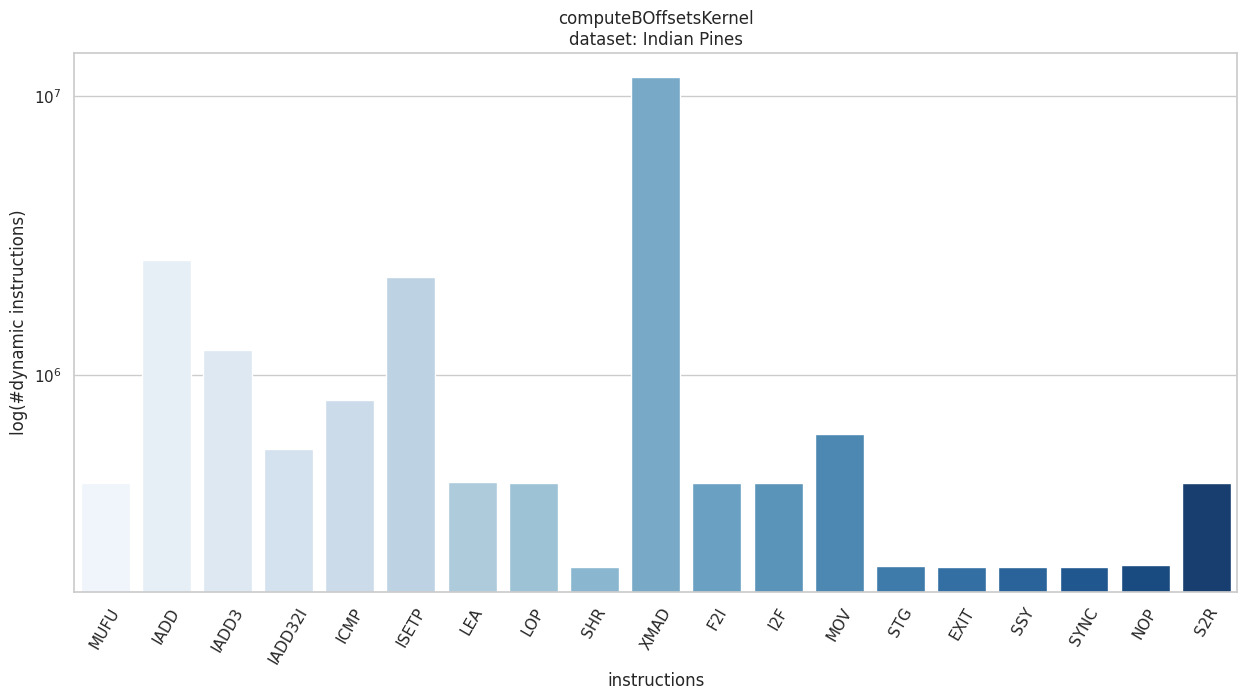

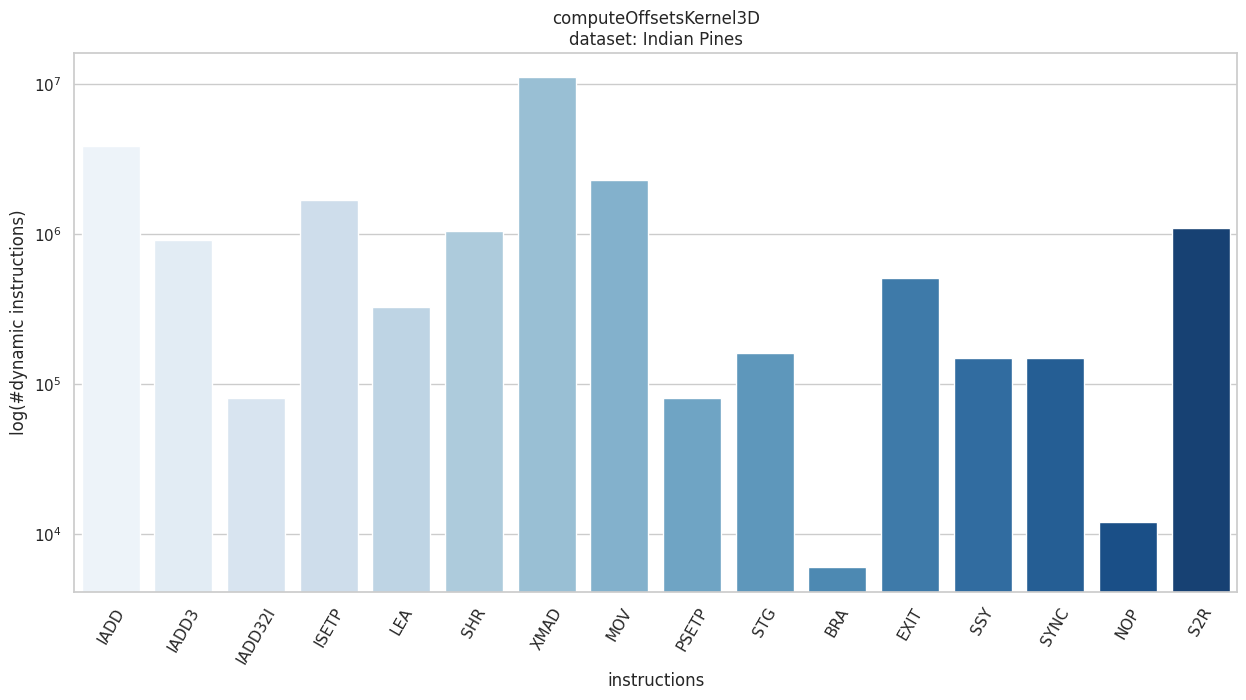

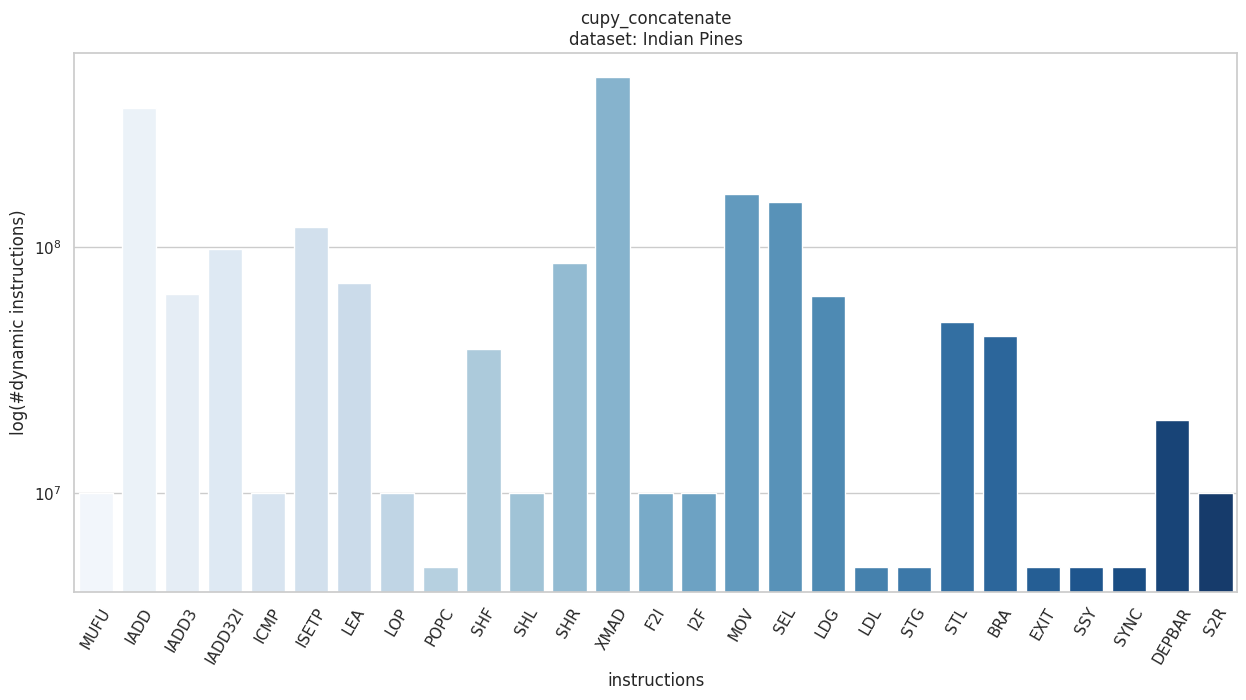

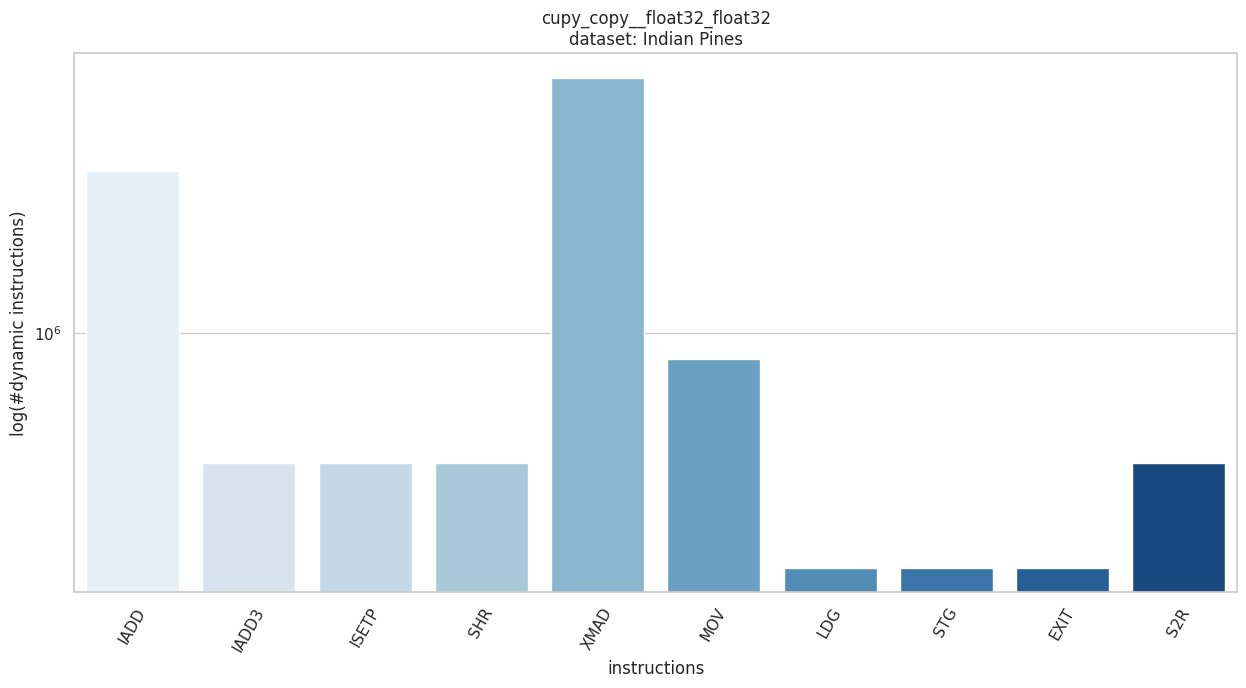

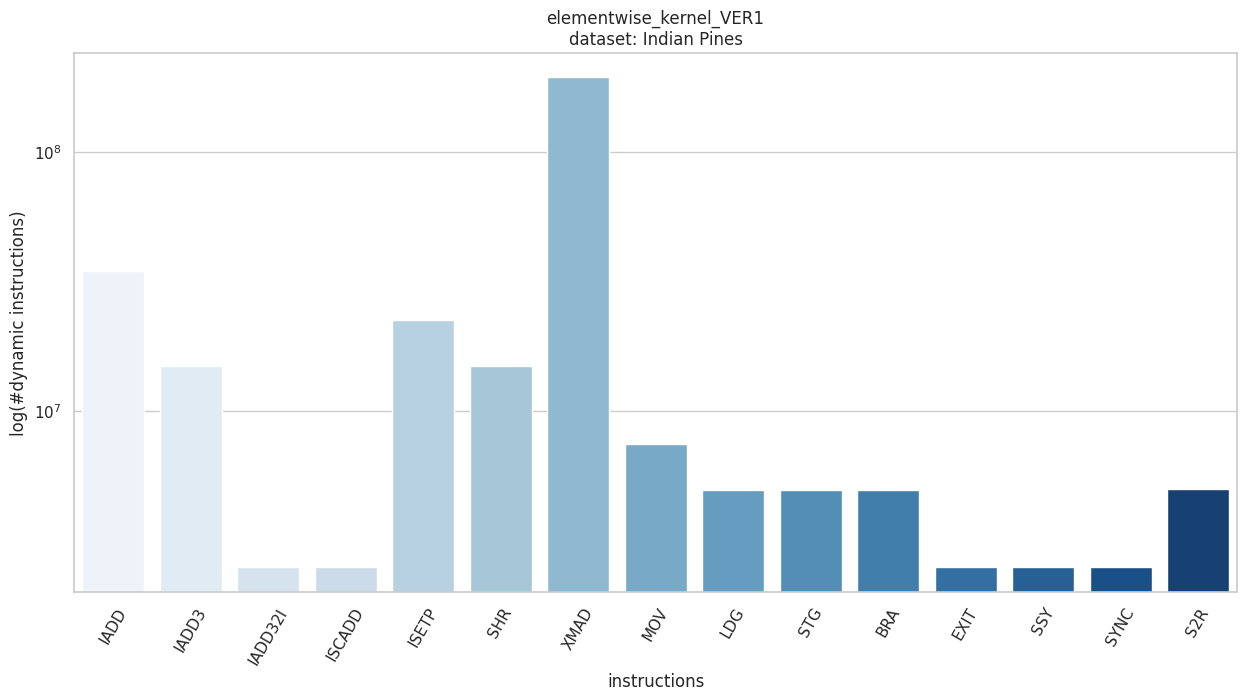

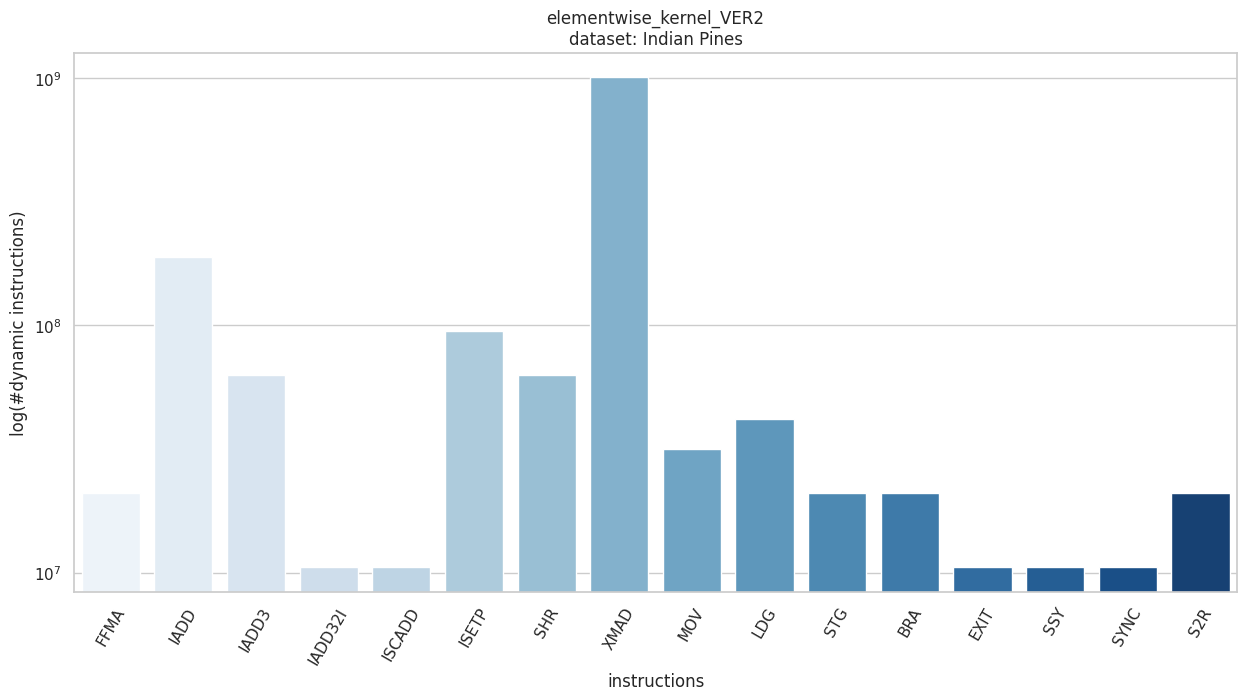

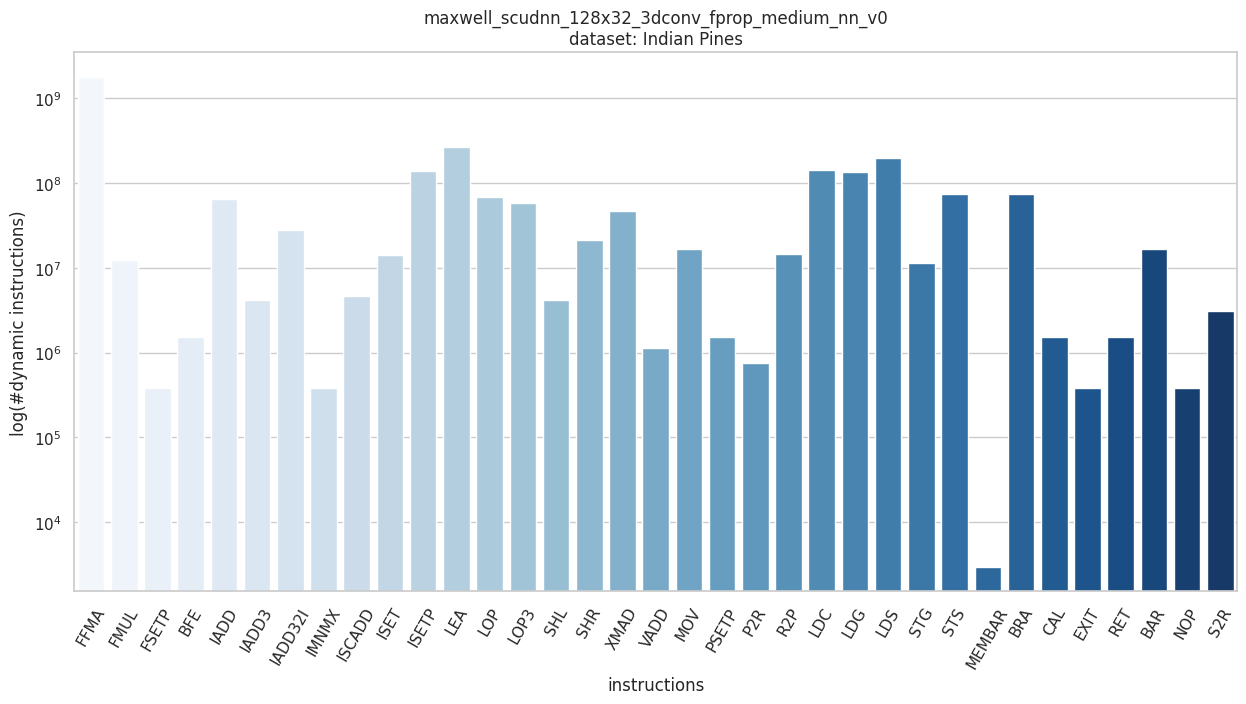

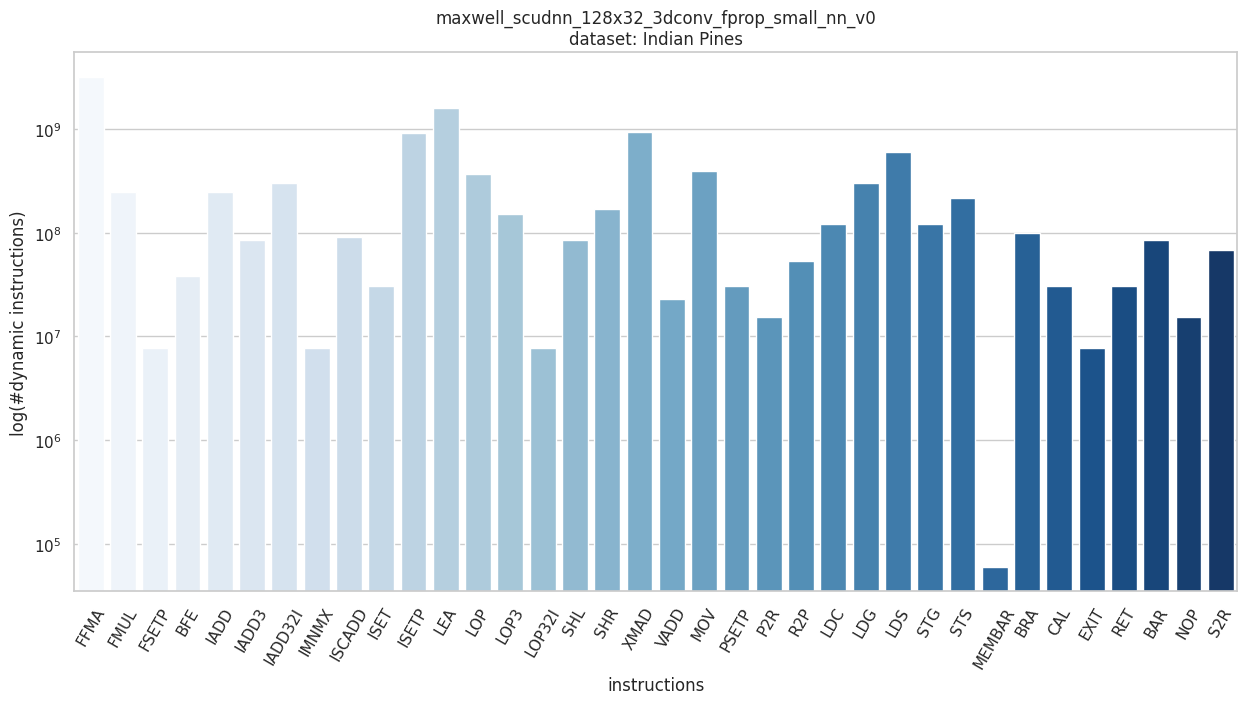

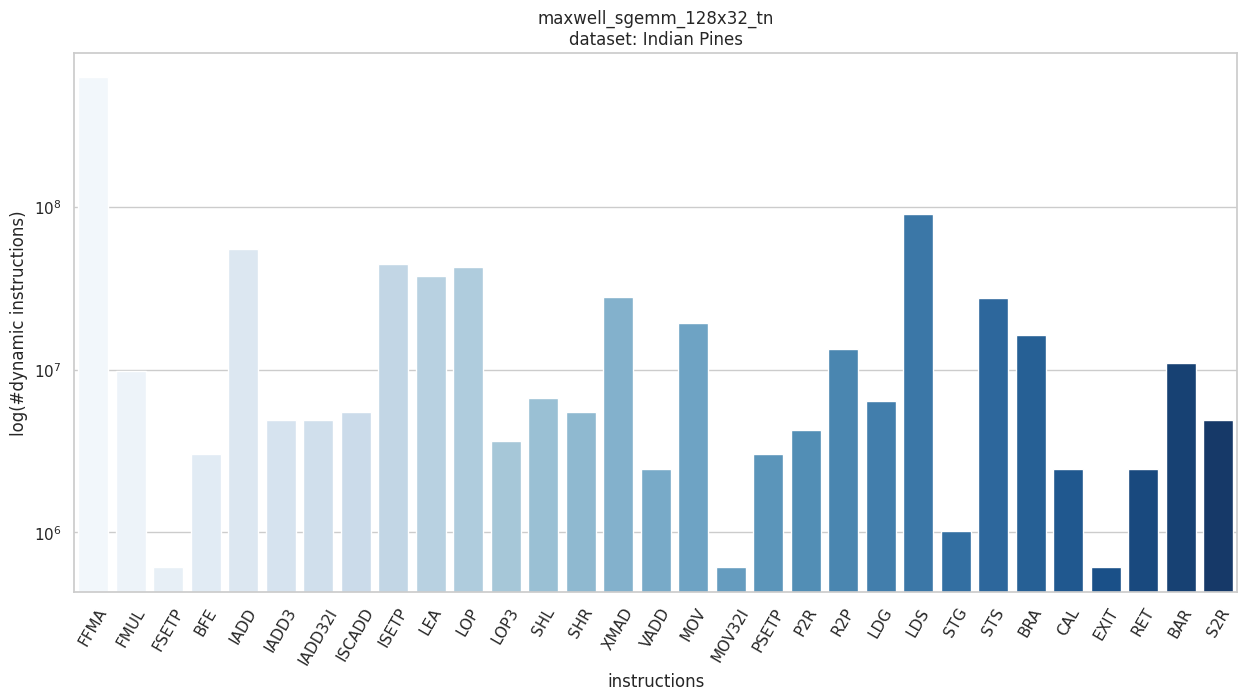

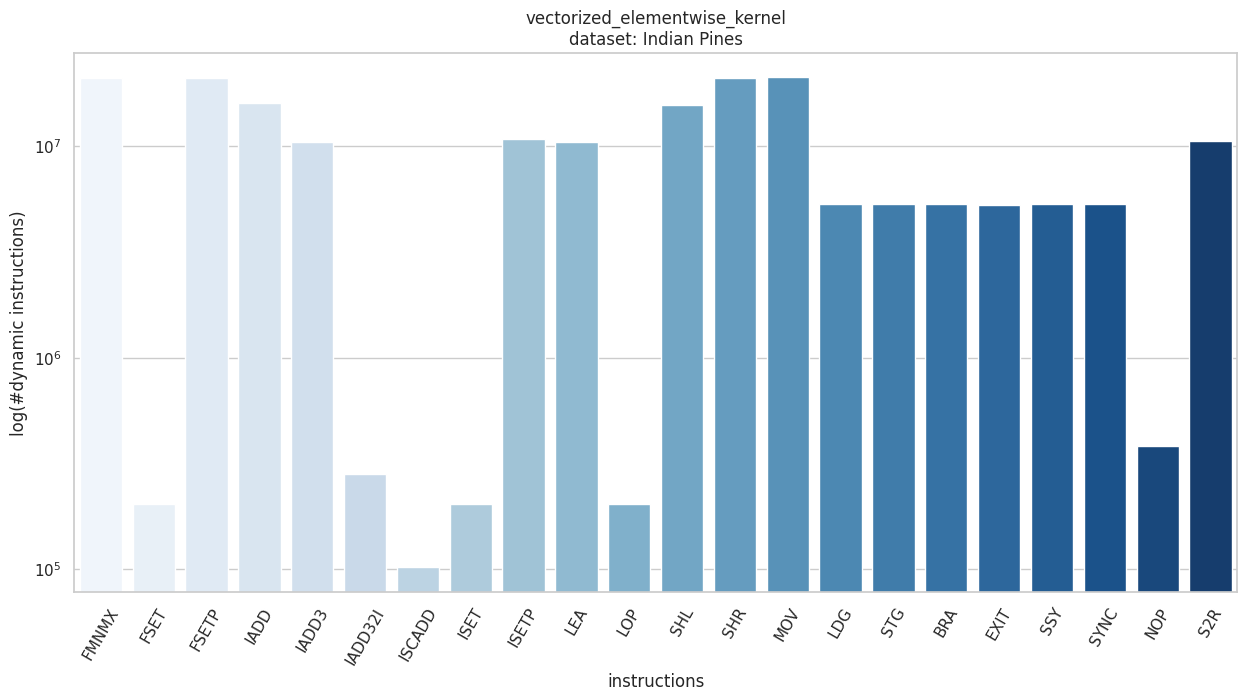

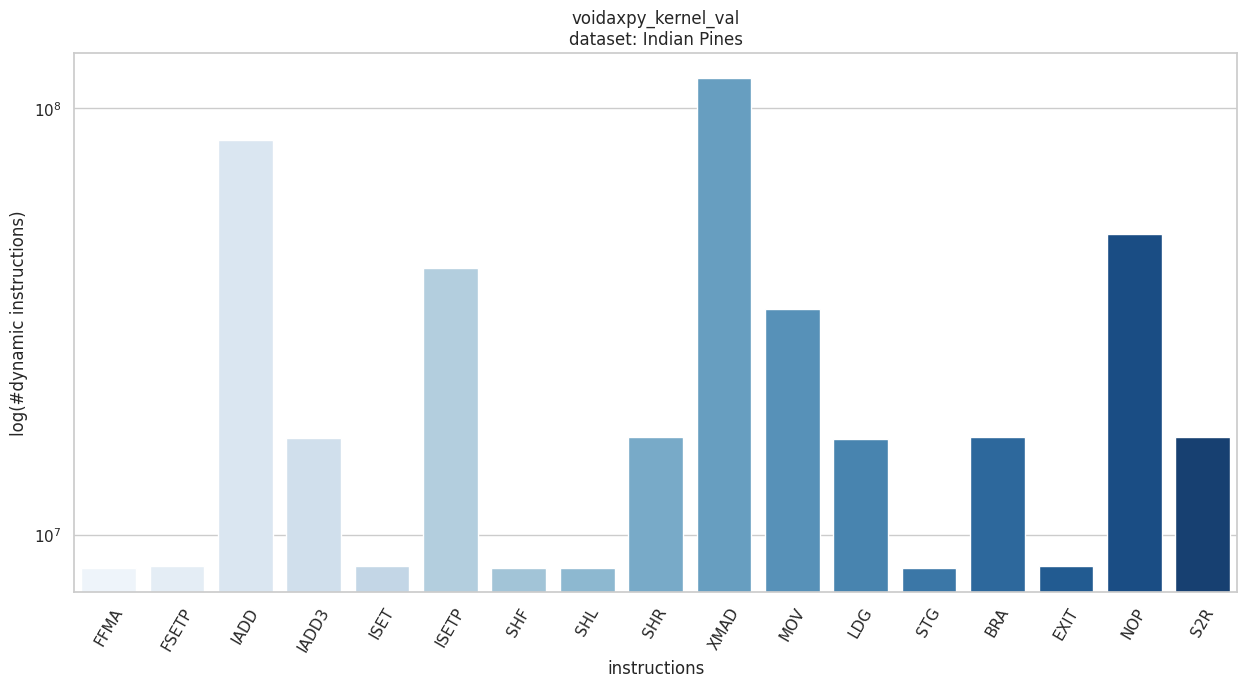

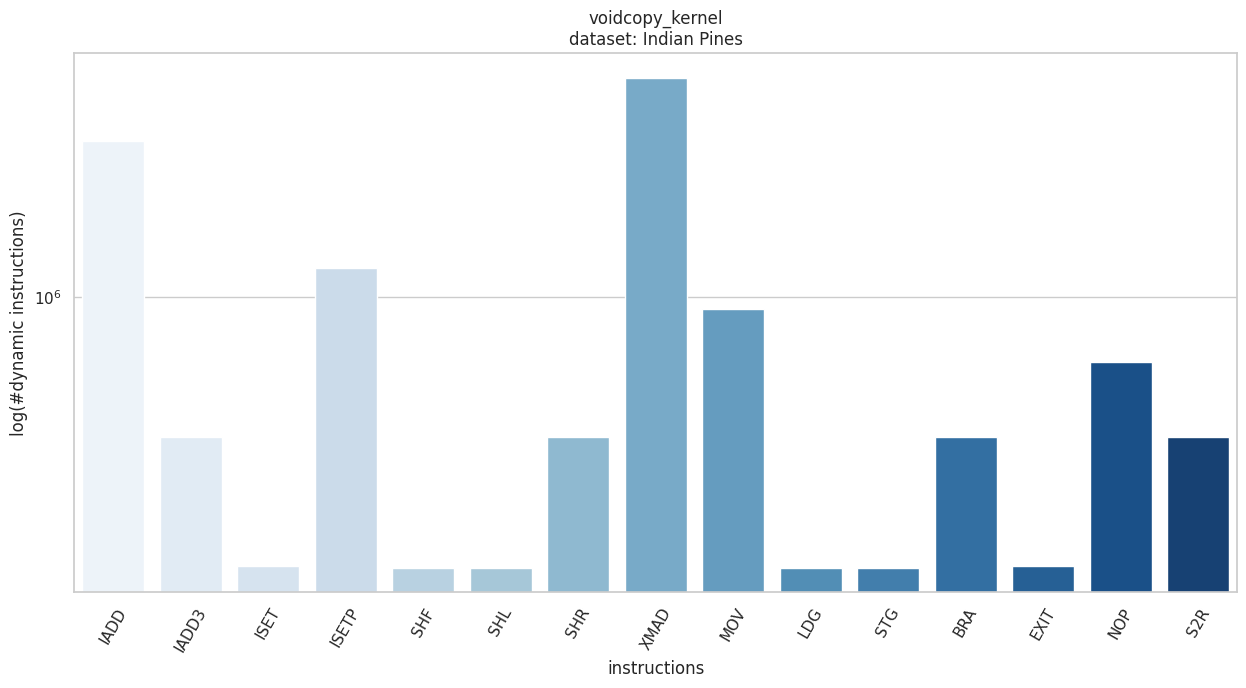

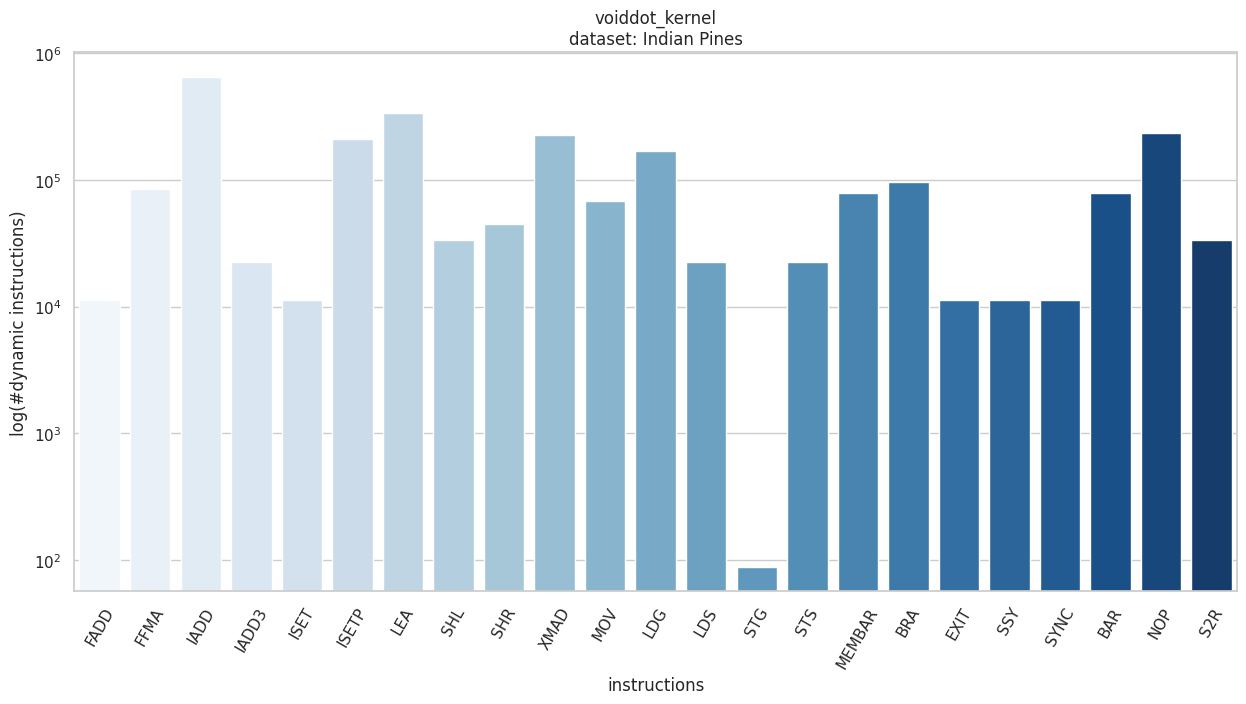

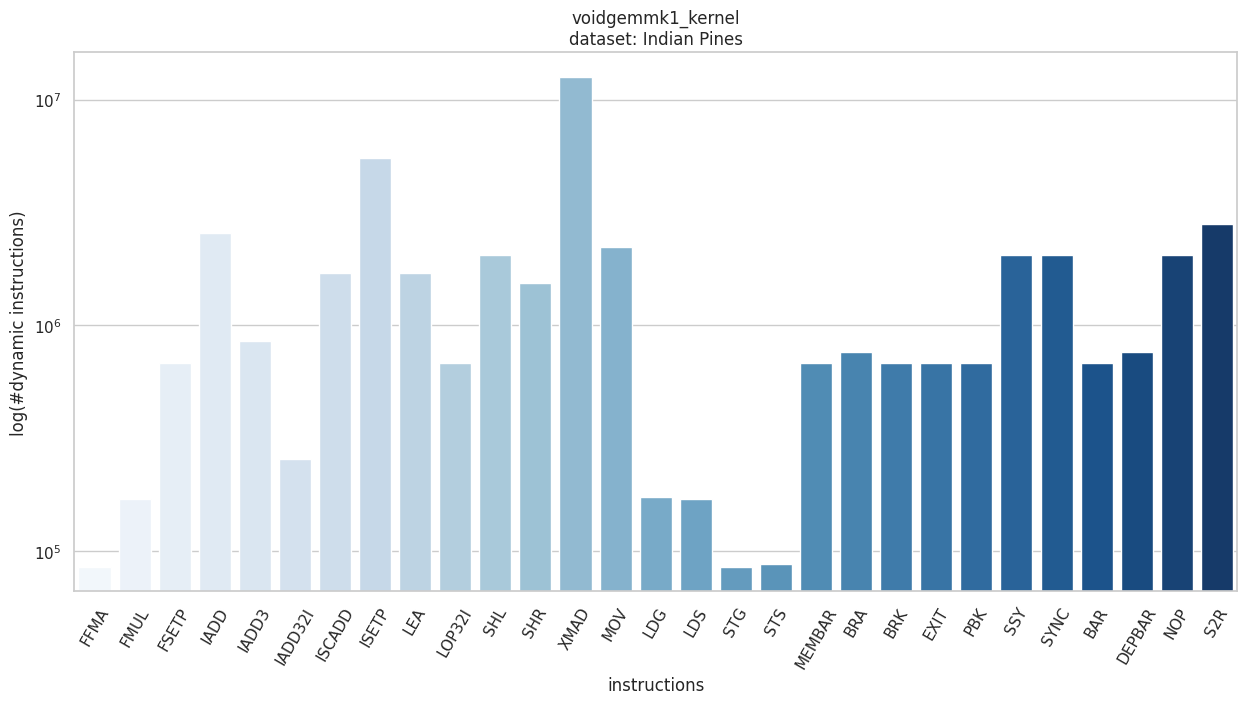

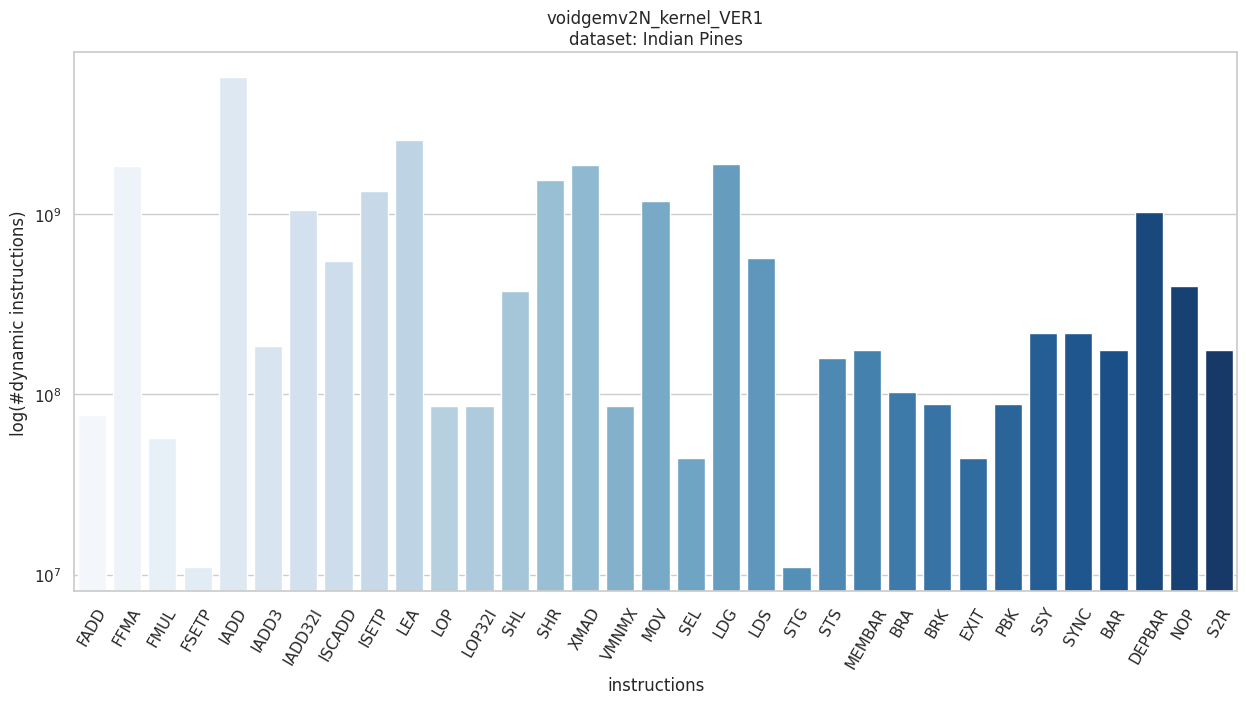

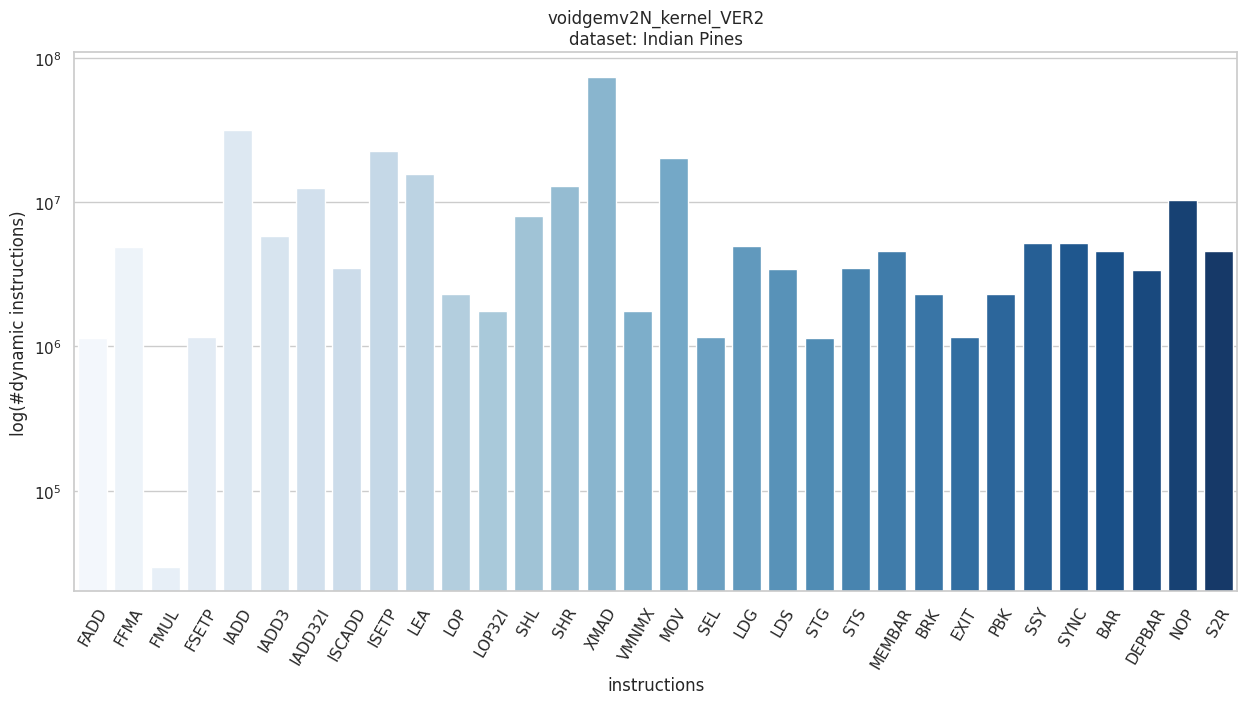

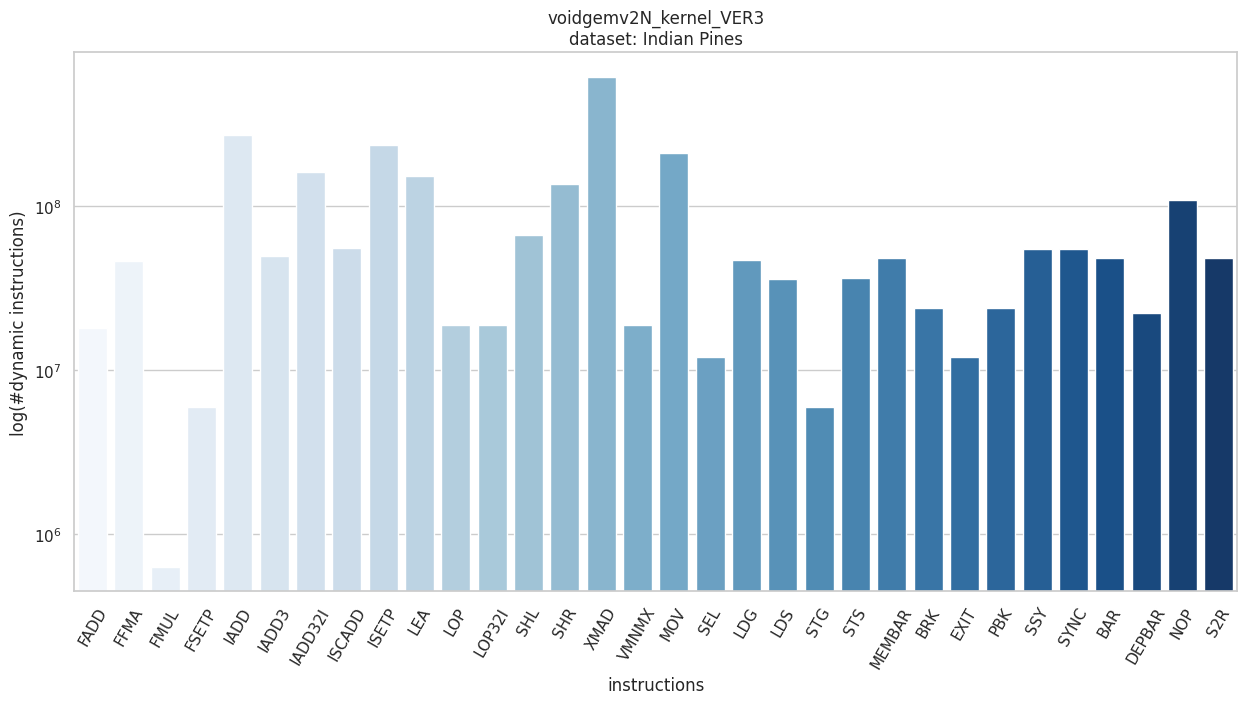

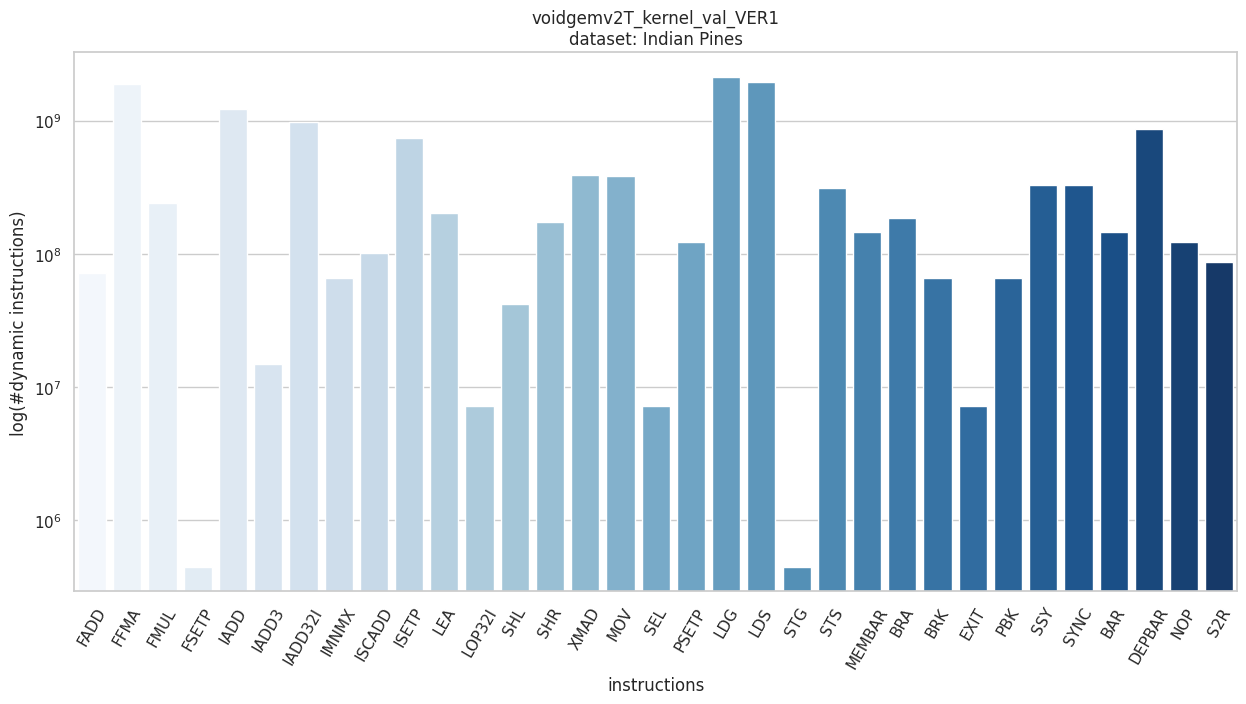

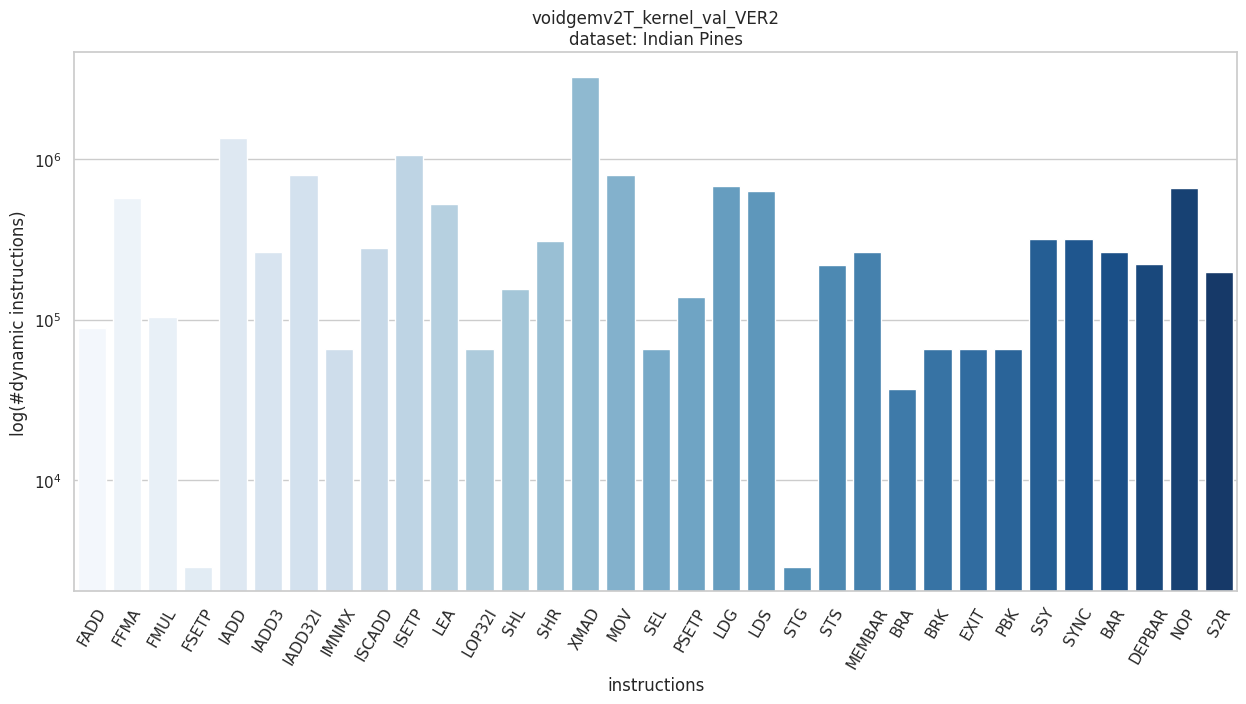

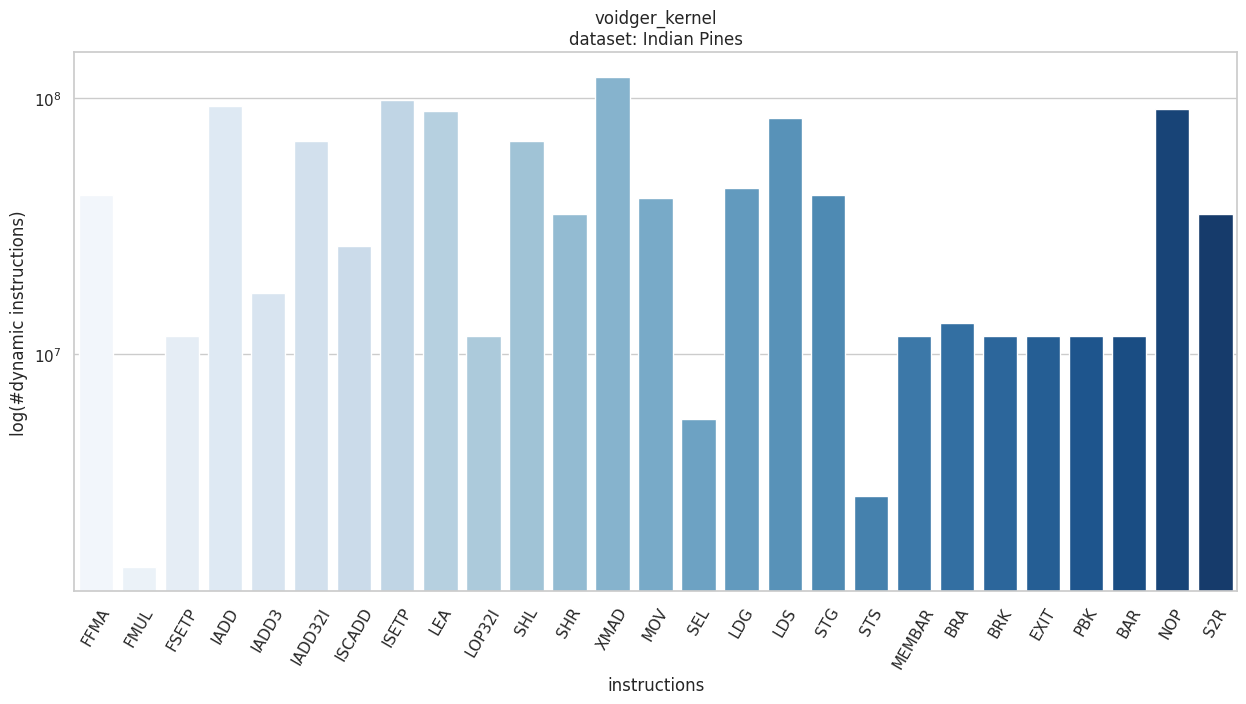

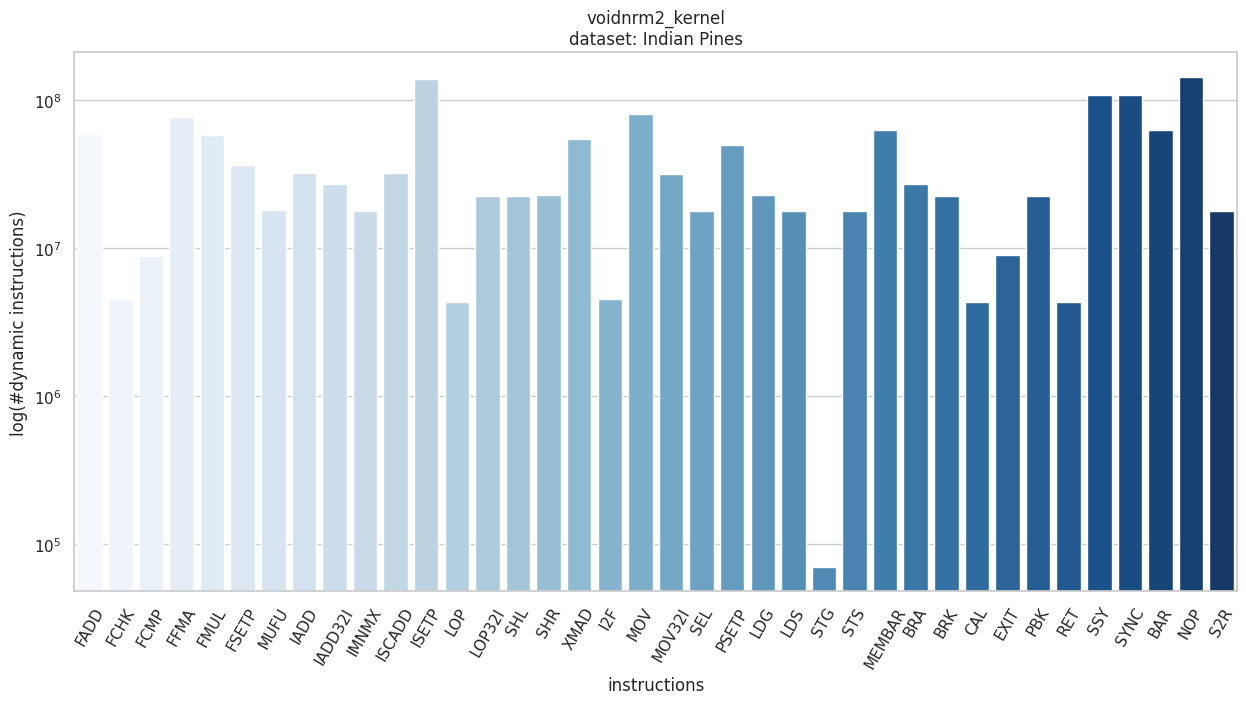

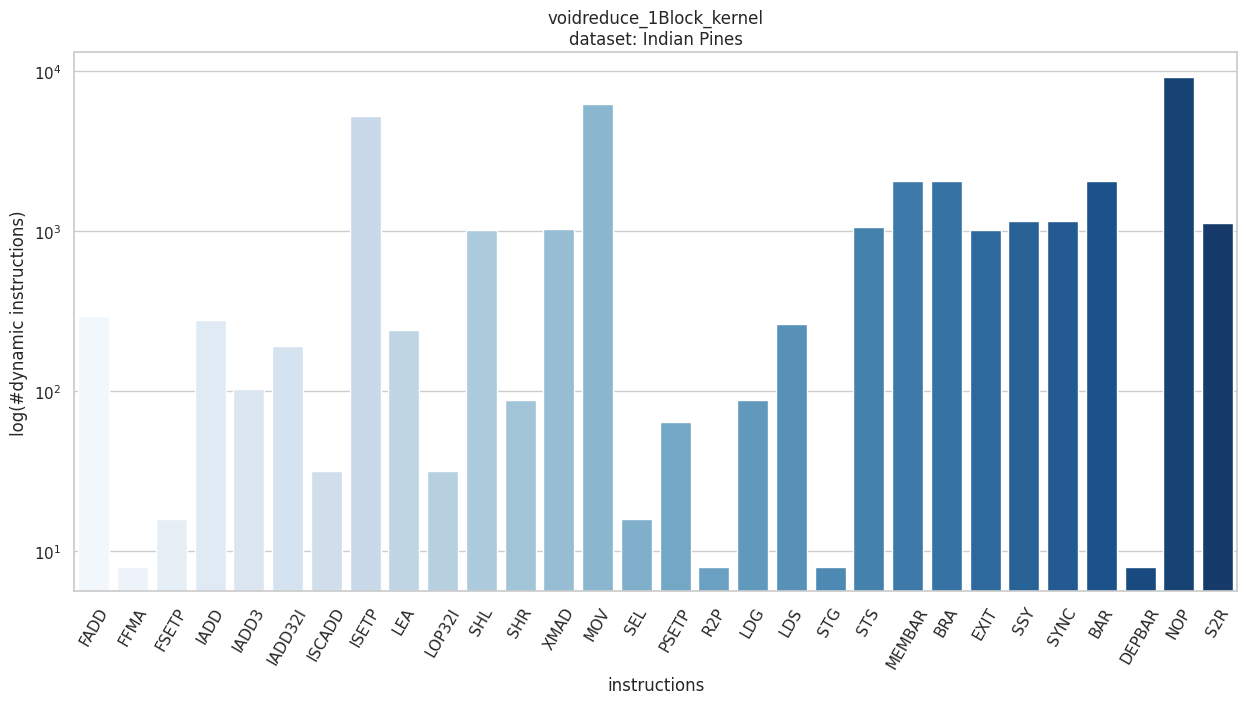

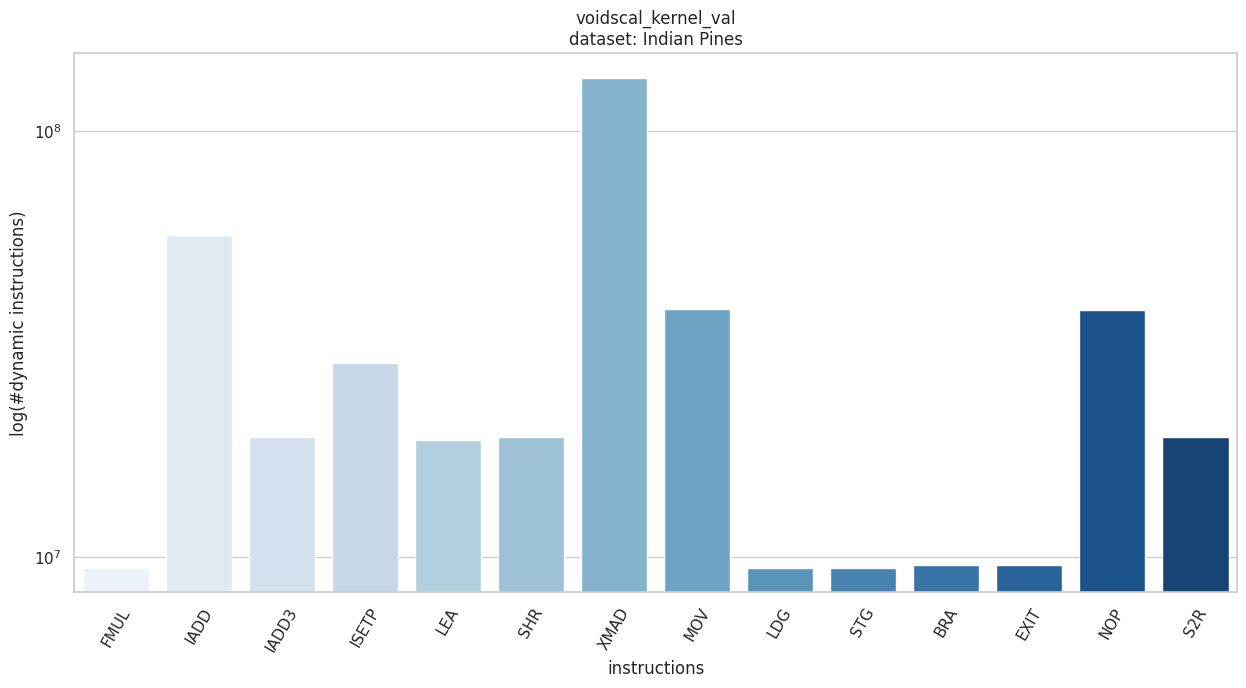

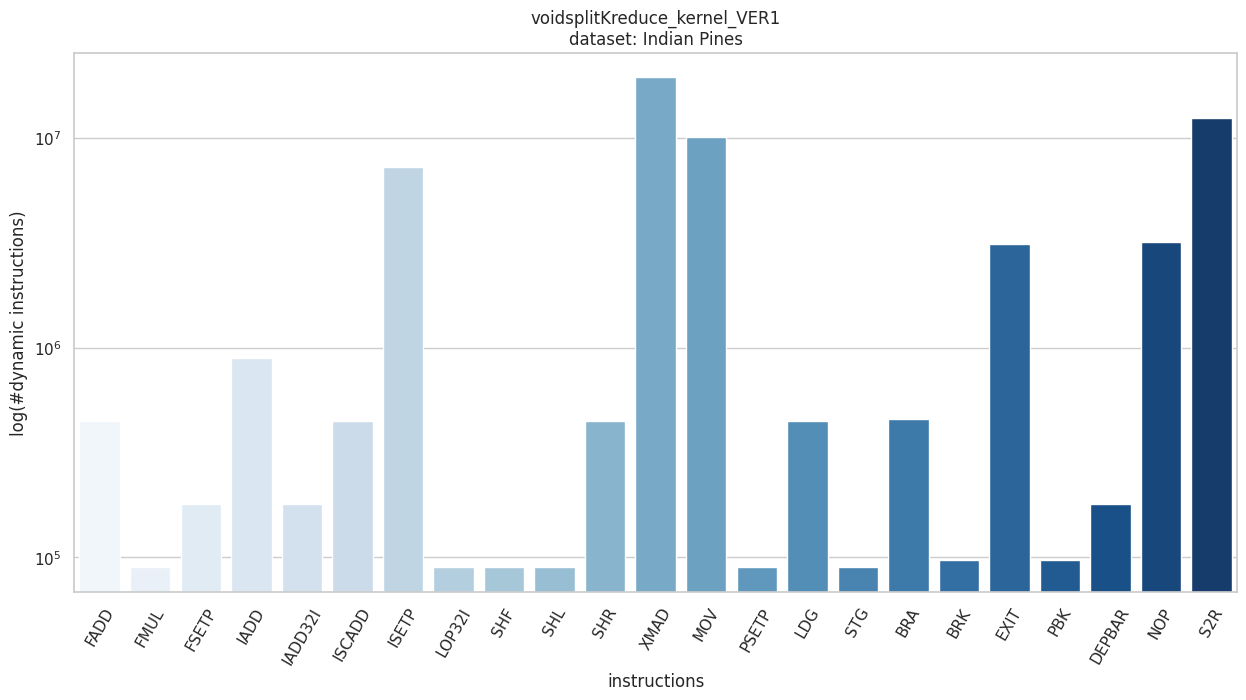

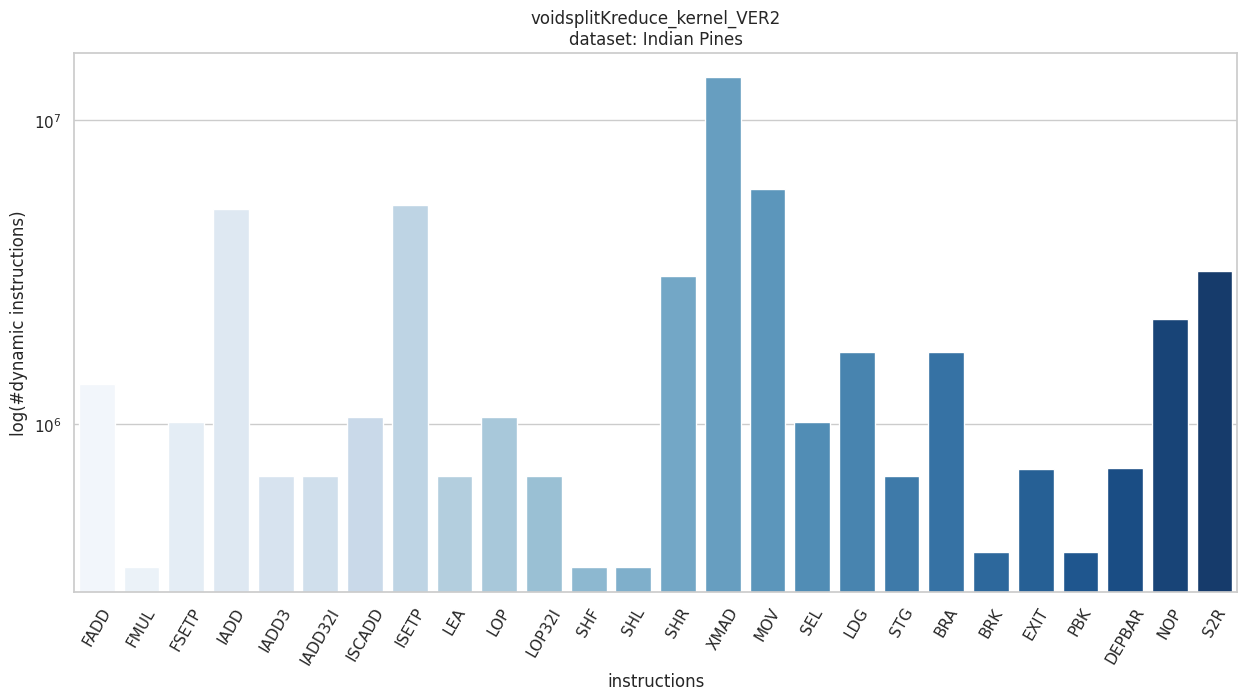

In [ ]:
def barplot_instrgroups(dkic_df):
  i = 0
  for idx in dkic_df.index:
    plt.figure(i)
    i+=1

    series = dkic_df.loc[idx][dkic_df.loc[idx] != 0]

    sns.set_theme(style="whitegrid", rc={'figure.figsize':(15,7)}) # (15,7)(7,3)

    barplot = sns.barplot(data=series, palette='Blues')#.set_yscale('log')#.set(xlabel='instructions', ylabel='log(#executions)')
    barplot.set(xlabel='instructions', ylabel='log(#dynamic instructions)')
    barplot.set_yscale('log')
    #barplot.set_title('Floating Point 32 Instruction Group')
    barplot.tick_params(axis='x', rotation=60)
    barplot.set_title(f'{idx}\ndataset: {datasets_dict[DATASET]}')

    #save plot
    fig = barplot.get_figure()
    fig.savefig(f'plots/{DATASET}_instruction_distributions_per_kernel/{idx}', bbox_inches="tight")

barplot_instrgroups(dynamic_kernels_instrcounts_df)

In [ ]:
!zip -r plots_{DATASET}.zip ./plots

  adding: plots/ (stored 0%)
  adding: plots/indianPines_instruction_distributions_per_kernel/ (stored 0%)
  adding: plots/indianPines_instruction_distributions_per_kernel/voidnrm2_kernel.png (deflated 16%)
  adding: plots/indianPines_instruction_distributions_per_kernel/vectorized_elementwise_kernel.png (deflated 18%)
  adding: plots/indianPines_instruction_distributions_per_kernel/computeBOffsetsKernel.png (deflated 19%)
  adding: plots/indianPines_instruction_distributions_per_kernel/voidgemv2T_kernel_val_VER1.png (deflated 16%)
  adding: plots/indianPines_instruction_distributions_per_kernel/voidaxpy_kernel_val.png (deflated 20%)
  adding: plots/indianPines_instruction_distributions_per_kernel/voidsplitKreduce_kernel_VER2.png (deflated 18%)
  adding: plots/indianPines_instruction_distributions_per_kernel/voidger_kernel.png (deflated 17%)
  adding: plots/indianPines_instruction_distributions_per_kernel/computeOffsetsKernel3D.png (deflated 19%)
  adding: plots/indianPines_instruction

In [ ]:
!rm -r plots/salinas_distribution_over_instructions_per_instructiongrp